Importing useful libraries to the code

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from collections import defaultdict
from datetime import datetime
from random import randint

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Section 1 . Checking the datasets
* In this section we are exploring the datasets that we should work on
* We have 3 different datasets that have the same columns and providing certain amount of information that we need to work on, so let's take a look at what we have here.


The datasets we will work on are: steam_reviews, steam_reviews_bonus_1 and steam_reviews_bonus_2

In [12]:
# Here we store the names of our datasets: 
Datasets = ['steam_reviews_bonus_1.csv', 'steam_reviews_bonus_2.csv', 'steam_reviews.csv', 'steam_reviews_combined.csv']
Path = '/home/mehrdad/Downloads/'
Chunksize = 10 ** 6
df = pd.read_csv(Datasets[0], nrows = 1)
Columns = list(df.columns[2:])

* **The datasets are so large to fit into the RAM completely, sometimes we have to bring the datasets chunk by chunk. The variable Chunksize correspond to the size of each chunk.**

* **We want to combine all of these three datasets to a single csv file, so we have added another csv file named 'steam_reviews_combined' which will contain all the records .**

# steam_reviews_bonus_1

## Columns

First we take a look at what are the columns in this dataset

In [87]:
df = pd.read_csv(Datasets[0], nrows = 1)
display(df.columns.to_frame(name = 'Column name', index = False))

,Column name
0,Unnamed: 0
1,Unnamed: 0.1
2,app_id
3,app_name
4,review_id
5,language
6,review
7,timestamp_created
8,timestamp_updated
9,recommended


## Subset of columns

* We can see that there are two index columns in the datasets. As they don't provide us any useful information, so we don't consider them. So we consider all the columns except those two first index columns. 

In [5]:
df = pd.read_csv(Datasets[0], nrows = 1)
Columns = df.columns[2:]
display(Columns.to_frame(name = 'Column name', index = False))
Columns = list(Columns)

,Column name
0,app_id
1,app_name
2,review_id
3,language
4,review
5,timestamp_created
6,timestamp_updated
7,recommended
8,votes_helpful
9,votes_funny


## Distinct values

* Here we explored how many distinct values are there for each of the columns. 

In [257]:
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns: 
    MySet = set()
    for chunk in pd.read_csv(Datasets[0], chunksize = Chunksize, usecols = [i]):
        MySet.update(chunk[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
display(UniqueValue)

/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/mehrdad/.local/lib/pytho

,Column Name,#Distinct values
0,app_id,125
1,app_name,122
2,review_id,10000002
3,language,29
4,review,7678008
5,timestamp_created,10000001
6,timestamp_updated,9999999
7,recommended,3
8,votes_helpful,2199
9,votes_funny,1671


As we can see in the results, we have some issues in the dataset. For example:
* We received some warnings when processing the records. We got this error because some of the columns contain more than one type of data.
* Each 'app_id' should correspond to a specific 'app_name' but here these two values have different number of distinct values. 
* Some columns that should contain boolean values have more than 2 values. In general boolean columns can get only True or False. 

In order to fix these issues, we thought maybe these issues caused by the rows that contain null values. Even we observed that in some rows, some columns have been shifted which resulted to some columns contain null values. 

So we will take a look at how many null values are there for each column:

/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-pa

,Column Name,#Nulls
0,app_id,0
1,app_name,0
2,review_id,0
3,language,0
4,review,17512
5,timestamp_created,4
6,timestamp_updated,4
7,recommended,4
8,votes_helpful,4
9,votes_funny,4


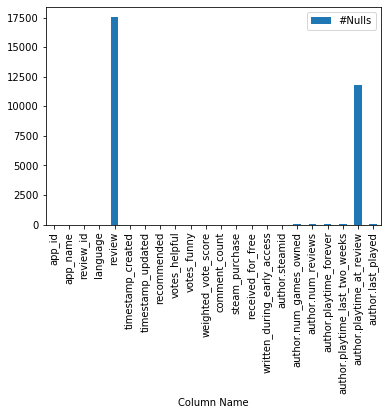

In [178]:
# Calculation the number of null values in each column 
NullValuesRep = pd.DataFrame(columns = ['Column Name','#Nulls'] )
for i in Columns:
    df = pd.read_csv(Datasets[0],usecols = [i])
    NullValuesRep = NullValuesRep.append({'Column Name':i, '#Nulls': df[df[i].isnull()].size},ignore_index = True )
    
display(NullValuesRep.style.set_caption('Number of Null values:'))
display(NullValuesRep.plot(kind = 'bar', x = 'Column Name'))

The results were a little weird as the majority of the columns had the same number of null values. 

We decided to remove those rows that contain null values for three reasons:
1. We have a huge amount of data, so even we remove some of them the outcome of the analysis won't change a lot. 
2. Rows that have missing values won't provide of much useful information as they may contain more than one null value. 
3. By doing this, maybe we can fix the issues that we had so far. 

In [216]:
First = True
for chunk in pd.read_csv(Datasets[0], chunksize=Chunksize, usecols = Columns[2:]):
    chunk = chunk.dropna()
    if First: 
        chunk.to_csv('steam_reviews_combined.csv', mode='a', header = True, index = False)
        First = False
    else:
        chunk.to_csv('steam_reviews_combined.csv', mode='a', header = False, index = False)

* **Note:** we want to pre-process each dataset and then merge them together and work on a single file. 
As this dataset is the first dataset that we are performing the pre-processing on, so we add its record to the combined file and then see how will be the results.


Now we will check again what are the number of distinct values for each of the columns in the dataset after removing the rows that contain null values. 

In [260]:
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns: 
    MySet = set()
    for chunk in pd.read_csv(Datasets[-1], chunksize = Chunksize, usecols = [i]):
        MySet.update(chunk[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
display(UniqueValue)

,Column Name,#Distinct values
0,app_id,121
1,app_name,121
2,review_id,9970689
3,language,28
4,review,7668032
5,timestamp_created,9970689
6,timestamp_updated,9970689
7,recommended,2
8,votes_helpful,1897
9,votes_funny,1661


* **It looks like we have cleaned the first dataset**

Now we show here what is the type of each column in this dataset. 

In [264]:
df = pd.read_csv(Datasets[-1], nrows = 1)
display(df.dtypes.to_frame("Data Type"))

,Data Type
app_id,float64
app_name,object
review_id,int64
language,object
review,object
timestamp_created,float64
timestamp_updated,float64
recommended,bool
votes_helpful,int64
votes_funny,float64


Now let's go to the second dataset and see what we have there. 

# steam_reviews_bonus_2

## Columns 

First let's take a look at the columns in this dataset

In [271]:
df = pd.read_csv(Datasets[1], nrows = 1)
display(df.columns.to_frame(name = 'Column name', index = False))

,Column name
0,Unnamed: 0
1,Unnamed: 0.1
2,app_id
3,app_name
4,review_id
5,language
6,review
7,timestamp_created
8,timestamp_updated
9,recommended


* Like the first dataset, we can see that there are two index columns in the datasets. As they don't provide us any useful information, so we don't consider them. We consider all the columns except those two columns. 

In [270]:
df = pd.read_csv(Datasets[1], nrows = 1)
Columns = df.columns[2:]
display(Columns.to_frame(index = False, name = 'Column name'))
Columns = list(Columns)

,Column name
0,app_id
1,app_name
2,review_id
3,language
4,review
5,timestamp_created
6,timestamp_updated
7,recommended
8,votes_helpful
9,votes_funny


## Distinct values

Let's check how many distinct values are there for each column. 

In [240]:
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns:
    MySet = set()
    df = pd.read_csv(Datasets[1] , usecols = [i])
    MySet.update(df[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
display(UniqueValue)

/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-pa

,Column Name,#Distinct values
0,app_id,74
1,app_name,72
2,review_id,7000002
3,language,29
4,review,5551401
5,timestamp_created,6999998
6,timestamp_updated,6999999
7,recommended,3
8,votes_helpful,2175
9,votes_funny,1362


* Here we will see how many null values are in the columns of this dataset. 

/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mehrdad/.local/lib/python3.8/site-pa

,Column Name,#Nulls
0,app_id,0
1,app_name,0
2,review_id,0
3,language,0
4,review,9272
5,timestamp_created,4
6,timestamp_updated,4
7,recommended,4
8,votes_helpful,4
9,votes_funny,4


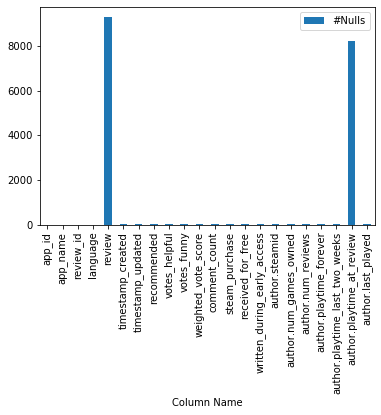

In [279]:
# Calculation the number of null values in each column 
NullValuesRep = pd.DataFrame(columns = ['Column Name','#Nulls'] )
for i in ColumnsType['Column Name']:
    df = pd.read_csv(Datasets[1],usecols = [i])
    NullValuesRep = NullValuesRep.append({'Column Name':i, '#Nulls': df[df[i].isnull()].size},ignore_index = True )
NullValuesRep = NullValuesRep.style.set_caption('Number of Null values:')
display(NullValuesRep)
display(NullValuesRep.data.plot(kind = 'bar', x = 'Column Name'))

With the same approach as previous dataset we remove the rows that have null values.  
For this dataset we first add the rows to another file and if everything worked fine we will add them to the combined file. 

In [246]:
First = True
for chunk in pd.read_csv(Datasets[1], chunksize=Chunksize, usecols = Columns):
    chunk = chunk.dropna()
    if First: 
        chunk.to_csv('TestFile1.csv', mode='a', header = True, index = False)
        First = False
    else:
        chunk.to_csv('TestFile1.csv', mode='a', header = False, index = False)

Now let's take a look at how many distinct values we have for each of the columns in this dataset. 

In [247]:
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns:
    MySet = set()
    df = pd.read_csv('TestFile1.csv', usecols = [i])
    MySet.update(df[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
display(UniqueValue)

,Column Name,#Distinct values
0,app_id,70
1,app_name,70
2,review_id,6982538
3,language,28
4,review,5544420
5,timestamp_created,6982538
6,timestamp_updated,6982538
7,recommended,2
8,votes_helpful,1884
9,votes_funny,1355


Looks like we cleaned this dataset as well. 

Now we will take a look at the types of each column in this new version of second dataset. 

In [276]:
df = pd.read_csv('TestFile1.csv', nrows = 1)
display(df.dtypes.to_frame("Data Type"))

,Data Type
app_id,int64
app_name,object
review_id,int64
language,object
review,object
timestamp_created,int64
timestamp_updated,float64
recommended,bool
votes_helpful,int64
votes_funny,int64


We can see everything is fine in this file as well, so we add this dataset to the end of combined file. 

In [275]:
for chunk in pd.read_csv('TestFile1.csv', chunksize=Chunksize, usecols = Columns):
    chunk.to_csv(Datasets[-1], mode='a', header = False, index = False)

Now we will go through the last dataset. 

# stream_reviews

First let's take a look at the columns in this dataset

In [282]:
df = pd.read_csv(Datasets[2], nrows = 1)
display(df.columns.to_frame(name = 'Column name', index = False))

,Column name
0,Unnamed: 0
1,app_id
2,app_name
3,review_id
4,language
5,review
6,timestamp_created
7,timestamp_updated
8,recommended
9,votes_helpful


Unlike the other two datasets, here we have just one column as the index of the datasets. Even with this, as this column doesn't give us any information we rather to remove it from our columns. 

In [42]:
df = pd.read_csv(Datasets[2], nrows = 1)
Columns = df.columns[1:]
display(Columns.to_frame(index = False, name = 'Column name'))
Columns = list(Columns)

,Column name
0,app_id
1,app_name
2,review_id
3,language
4,review
5,timestamp_created
6,timestamp_updated
7,recommended
8,votes_helpful
9,votes_funny


Now let's take a look at how many distinct values are there for each column in this dataset. 

In [285]:
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns:
    MySet = set()
    df = pd.read_csv(Datasets[2], usecols = [i])
    MySet.update(df[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
display(UniqueValue)

,Column Name,#Distinct values
0,app_id,315
1,app_name,315
2,review_id,21612444
3,language,28
4,review,16657838
5,timestamp_created,18932372
6,timestamp_updated,18739831
7,recommended,2
8,votes_helpful,2716
9,votes_funny,2215


Then we will check how many null values each of these columns contain. 

,Column Name,#Nulls
0,app_id,0
1,app_name,0
2,review_id,0
3,language,0
4,review,33742
5,timestamp_created,0
6,timestamp_updated,0
7,recommended,0
8,votes_helpful,0
9,votes_funny,0


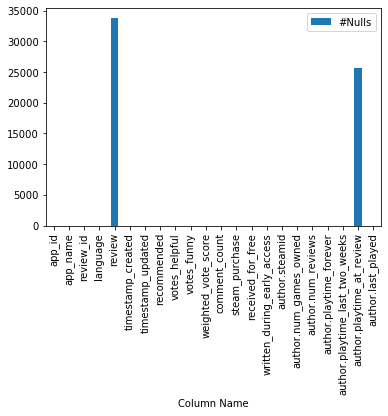

In [287]:
# Calculation the number of null values in each column 
NullValuesRep = pd.DataFrame(columns = ['Column Name','#Nulls'] )
for i in ColumnsType['Column Name']:
    df = pd.read_csv(Datasets[2],usecols = [i])
    NullValuesRep = NullValuesRep.append({'Column Name':i, '#Nulls': df[df[i].isnull()].size},ignore_index = True )
NullValuesRep = NullValuesRep.style.set_caption('Number of Null values:')
display(NullValuesRep)
display(NullValuesRep.data.plot(kind = 'bar', x = 'Column Name'))

* Despite the fact that in this dataset there aren't any issues regarding the preserving the column type, but we would rather to remove the rows that contain null values. 
* Again like the second dataset, we first move the rows that don't contain null values to another file and if everything was working fine we will add this data to the combined file

In [ ]:
First = True
for chunk in pd.read_csv(Datasets[-1], chunksize=Chunksize, usecols = Columns):
    chunk = chunk.dropna()
    if First: 
        chunk.to_csv('TestFile2.csv', mode='a', header = True, index = False, encoding= None)
        First = False
    else:
        chunk.to_csv('TestFile2.csv', mode='a', header = False, index = False, encoding= None)

Now we will take a look at how many distinct values are there for each of the columns in this new data file. 

,Column Name,#Distinct values
0,app_id,315
1,app_name,315
2,review_id,21553216
3,language,28
4,review,16636582
5,timestamp_created,18883279
6,timestamp_updated,18691030
7,recommended,2
8,votes_helpful,2716
9,votes_funny,2215


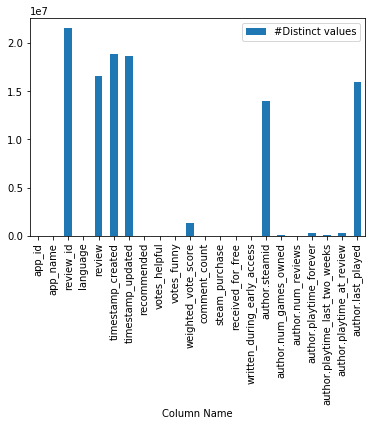

In [7]:
# Compute the number of distinct value in each column 
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns:
    MySet = set()
    for chunk in pd.read_csv('TestFile2.csv', chunksize=Chunksize, usecols = [i]):
        MySet.update(chunk[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
UniqueValue = UniqueValue.style.set_caption('Number of discinct values')
display(UniqueValue)
display(UniqueValue.data.plot(kind = 'bar', x = 'Column Name'))

Now let's take a look at the types of each column. 

In [8]:
df = pd.read_csv('TestFile2.csv', nrows = 1)
display(df.dtypes.to_frame("Data Type"))

,Data Type
app_id,int64
app_name,object
review_id,int64
language,object
review,object
timestamp_created,float64
timestamp_updated,float64
recommended,bool
votes_helpful,int64
votes_funny,int64


As everything seems fine so let's add this dataset to the combined file. 

In [9]:
for chunk in pd.read_csv('TestFile2.csv', chunksize=Chunksize, usecols = Columns):
    chunk.to_csv(Datasets[-1], mode='a', header = False, index = False)

# Section 2. Combined file summary (RQ1)

Here we will take a look at different aspects of the all three datasets which have been combined into a single file. 

## 2.1 Column's type

### 2.1.1. Distribution of column type

,Column type
app_id,float64
app_name,object
review_id,int64
language,object
review,object
timestamp_created,float64
timestamp_updated,float64
recommended,bool
votes_helpful,int64
votes_funny,float64


--------------------------------------------------


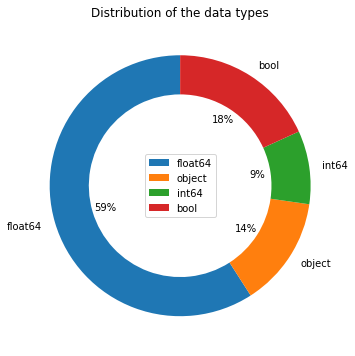

In [63]:
# Reading the first row of the dataset
df = pd.read_csv(Datasets[-1], nrows = 1)

#Displaying the type of each column in tabular format
display(df.dtypes.to_frame("Column type"))

# Take a list of columns
Columns = list(df.columns)

# To store the columns with the same type in one place 
ColumnsType = defaultdict(list)
# Keys: dtype, Values: Columns' name

# Storing the columns that share the same type
for i in Columns:
    ColumnsType[df.dtypes[i]].append(i)
print("-" * 50 )
# Plotting the distribution of each type
label, Size = list(map(str, ColumnsType)), list(map(len, ColumnsType.values()))
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie(Size, labels = label, wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Distribution of the data types')
plt.show()

### 2.1.2. Categorizing columns

In [59]:
# Showing columns that have the same types in tabular format
for i in ColumnsType:
    Temp = pd.DataFrame({'Column Name': ColumnsType[i]})
    Temp = Temp.style.set_caption('Type: '+ str(i))
    display(Temp)

,Column Name
0,app_id
1,timestamp_created
2,timestamp_updated
3,votes_funny
4,weighted_vote_score
5,comment_count
6,author.steamid
7,author.num_games_owned
8,author.num_reviews
9,author.playtime_forever


,Column Name
0,app_name
1,language
2,review


,Column Name
0,review_id
1,votes_helpful


,Column Name
0,recommended
1,steam_purchase
2,received_for_free
3,written_during_early_access


### 2.1.3. Categorical or Numerical

,Column Name
0,app_name
1,language
2,review


,Column Name
0,app_id
1,review_id
2,timestamp_created
3,timestamp_updated
4,recommended
5,votes_helpful
6,votes_funny
7,weighted_vote_score
8,comment_count
9,steam_purchase



--------------------------------------------------


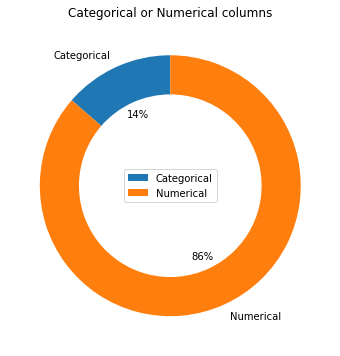

In [61]:
# Extract categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
CategoricalColumns = pd.DataFrame(columns = ['Column Name'])
for i in cat_cols: 
    CategoricalColumns = CategoricalColumns.append({'Column Name':i},ignore_index = True )
display(CategoricalColumns.style.set_caption('Categorical columns'))

# Extract numerical columns
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
NumericalColumns = pd.DataFrame(columns = ['Column Name'])
for i in num_cols: 
    NumericalColumns = NumericalColumns.append({'Column Name':i},ignore_index = True )
display(NumericalColumns.style.set_caption('Numerical columns'))

# Plotting the distribution of the categorical or numerical types
print('\n'+'-'*50)
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie([len(cat_cols), len(num_cols)], labels =['Categorical', 'Numerical'], wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Categorical or Numerical columns')
plt.show()

## 2.2. Number of records
Here we will take a look at how many records do we have in this dataset. 

In [56]:
# In order to find out how many records do we have in the dataset, we bring only one column of the dataset
# to the memory and count how many records are there. 

# To store the data for visualization and counting
NumberOfRecords, Counter  = pd.DataFrame(columns = ['#Records']), 0

# Bring the only one column of dataset chunk by chunk
for chunk in pd.read_csv(Datasets[-1], chunksize = Chunksize, usecols = ['app_id']):
    Counter += chunk.shape[0]

# To store the data to show it in tabular format
NumberOfRecords = NumberOfRecords.append({'#Records':Counter},ignore_index = True )
display(NumberOfRecords.style.set_caption('Number of records'))

,#Records
0,38641170


## 2.3. Distinct values

As we can see we are dealing with a huge amount of data here to analyze. 

,Column Name,#Distinct values
0,app_id,315
1,app_name,315
2,review_id,21553216
3,language,28
4,review,16636582
5,timestamp_created,35351484
6,timestamp_updated,35281964
7,recommended,2
8,votes_helpful,2716
9,votes_funny,2215


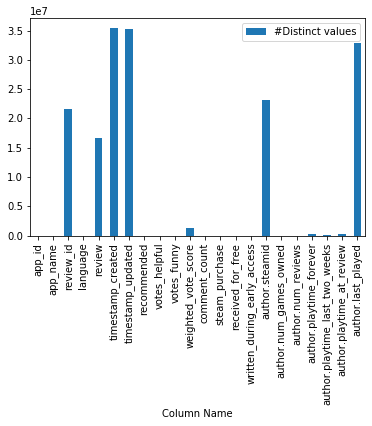

In [10]:
# Compute the number of distinct values in each column 
UniqueValue  = pd.DataFrame(columns = ['Column Name', '#Distinct values'])
for i in Columns:
    MySet = set()
    for chunk in pd.read_csv(Datasets[-1], chunksize=Chunksize, usecols = [i]):
        MySet.update(chunk[i].unique())
    UniqueValue = UniqueValue.append({'Column Name':i, '#Distinct values':len(MySet)},ignore_index = True )
display(UniqueValue.style.set_caption('Number of discinct values'))
display(UniqueValue.plot(kind = 'bar', x = 'Column Name'))

* Here we found out a really strange thing in the dataset. We have 38,641,170 records in the dataset while for the review id we have 21,553,216 different numbers. It seems that the two provided datasets for bonus point, have been prepared in another time which ended up to have the same review id for some of the records. 
* Or they are just a subset of the reviews in the original dataset. 

## 2.4. Null values

We know that when we were combining the datasets, we removed all the rows that contain null values, but let's again explore the dataset to make sure about it. 

,Column Name,#Nulls
0,app_id,0
1,app_name,0
2,review_id,0
3,language,0
4,review,0
5,timestamp_created,0
6,timestamp_updated,0
7,recommended,0
8,votes_helpful,0
9,votes_funny,0


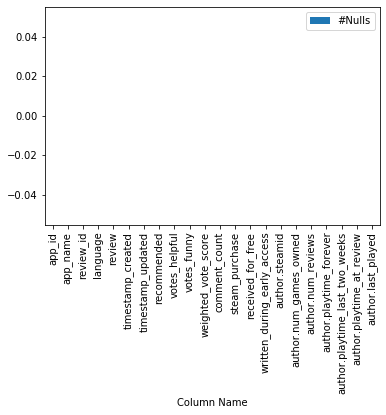

In [65]:
# Check the number of null values in each column 
NullValues, NullValuesRep = defaultdict(int), pd.DataFrame(columns = ['Column Name','#Nulls'] )

# Reading the data chunk by chunk and check how many null values are there for each column 
for chunk in pd.read_csv(Datasets[-1], chunksize = Chunksize):
    
    # Summing up all the number of null values that we found for each column in each chunk
    for col, value in enumerate(chunk.isnull().sum()):
        NullValues[Columns[col]]+= value
        
# Preparing the information for to represent        
for i in NullValues:
    NullValuesRep = NullValuesRep.append({'Column Name':i, '#Nulls': int(NullValues[i])},ignore_index = True )
NullValuesRep = NullValuesRep.style.set_caption('Number of Null values:')
display(NullValuesRep)
display(NullValuesRep.data.plot(kind = 'bar', x = 'Column Name'))

As we expected, there is no null value in the dataset. 

# Section 3. Answer some queries based on the data

# 3.1 RQ2

### 3.1.1. Plot the number of reviews for each application in descending order

Here we will bring just the column 'app_name' to answer this query as each review is associated with just one application. So if we count how many times an application's name was repeated in the records, we can easily find out how many reviews we had in the dataset for that application. 

In [14]:
# Reading the 'app_name' column to count the reviews for each app
df = pd.read_csv(Datasets[-1], usecols = ['app_name'])

Then we check how many times an application's name was repeated and show it in tabular format. 

In [16]:
# Count how many reviews is there for each app
AppReviewCount = df.value_counts()
display(AppReviewCount.to_frame('Count').reset_index().style.set_caption('Reviews for each application:'))

,app_name,Count
0,PLAYERUNKNOWN'S BATTLEGROUNDS,3285258
1,Grand Theft Auto V,2032744
2,Tom Clancy's Rainbow Six Siege,1679674
3,Garry's Mod,1307630
4,Rust,1096040
5,Rocket League,994499
6,Among Us,966786
7,The Witcher 3: Wild Hunt,936658
8,Dead by Daylight,835988
9,ARK: Survival Evolved,796902


Here we plot just the first 100 most reviewed applications as when plotting all the application, the provided information is not that good to analyze. 

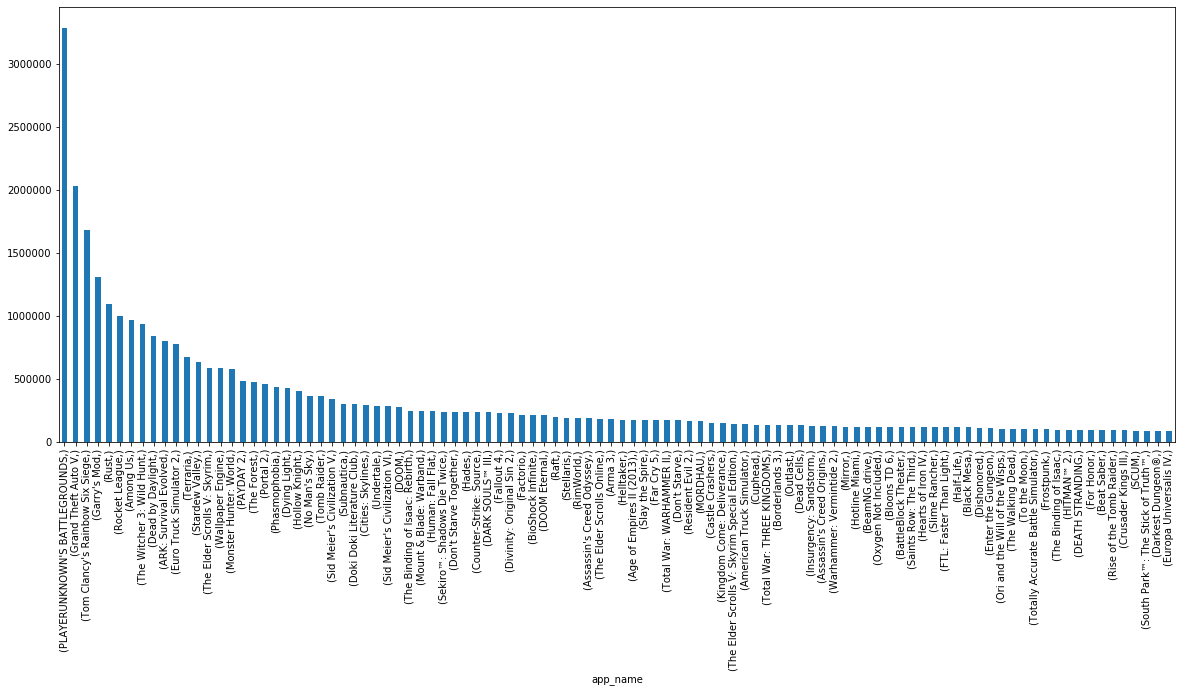

In [68]:
# Plot the first 100 most reviewed apps
AppReviewCount[:100].plot(figsize = (20, 8), kind = 'bar',color=plt.cm.Paired(np.arange(100)))

As I mentioned above, when we plot all the applications' data, the output is not that good. 

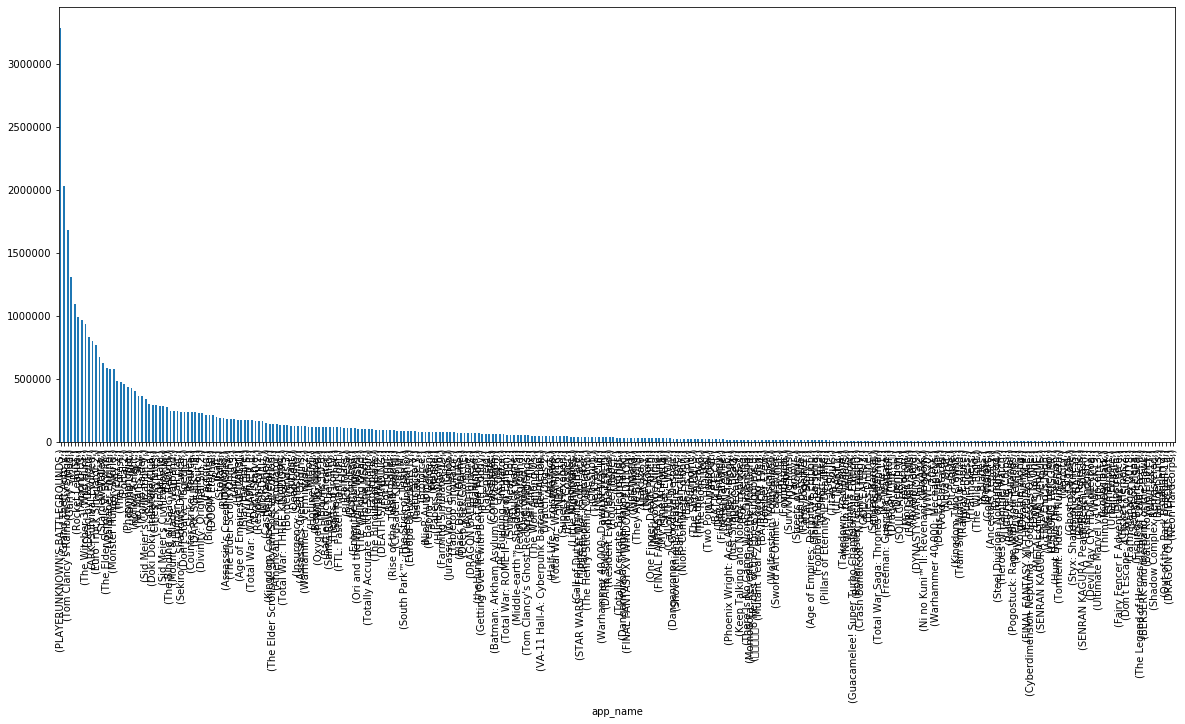

In [70]:
# Here is the plot for all 315 apps
AppReviewCount.plot(figsize = (20, 8), kind = 'bar')

### 3.1.2. What applications have the best Weighted Vote Score?

* We saw in the dataset's columns that there is a best weighted vote score. After checking the records we saw that for each review of a specific application, this score is changing. So here our approach is to pick the maximum weighted vote score for each application and then check which application had the best weighted vote score. 

In order to do this we bring 'app_name' column to have the application's name and 'weighted_vote_score' to get the score associated to a specific application. 

In [4]:
# Bring 'app_name' and 'weighted_vote_score' columns 
RQ_1_2_Columns = ['app_name', 'weighted_vote_score']
df = pd.read_csv(Datasets[-1], usecols = RQ_1_2_Columns)

In [5]:
# Groupby the dataframe based on the 'app_name' column to get the votes for each app
GroupedbyApp = df.groupby('app_name')

In [24]:
# Compute weighted vote scores and show the results in descending order

# Take the best weighted vote score for each application 
WeightedVoteScore = GroupedbyApp.max().sort_values(RQ_1_2_Columns[-1], ascending = False)
WeightedVoteScore = WeightedVoteScore.reset_index()

# Take the application that has the best weighted vote score among all and show it
BestVoteScore = WeightedVoteScore[WeightedVoteScore[RQ_1_2_Columns[-1]] 
                                  == WeightedVoteScore[RQ_1_2_Columns[-1]].max()]
display(BestVoteScore.style.set_caption('Application with the best weighted vote score:'))

# Show all the best weighted vote score among all applications
display(WeightedVoteScore.style.set_caption('All applications with their best weighted vote score:'))


,app_name,weighted_vote_score
0,Stardew Valley,0.995987


,app_name,weighted_vote_score
0,Stardew Valley,0.995987
1,Divinity: Original Sin 2,0.995245
2,Subnautica,0.994453
3,Mirror,0.994038
4,Wallpaper Engine,0.993540
5,Terraria,0.992892
6,The Forest,0.992581
7,Monster Hunter: World,0.992500
8,The Elder Scrolls Online,0.992356
9,Human: Fall Flat,0.992336


### 3.1.3. Which applications have the most and the least recommendations?

In order to answer this query we should go through each application's recommended column and check how many reviews for each of these application are recommend that application.  

In [25]:
# Bring 'app_name' and 'recommended' columns 
RQ_1_3_Columns = ['app_name', 'recommended']
df = pd.read_csv(Datasets[-1], usecols = RQ_1_3_Columns)

In [26]:
# Groupby the dataframe based on the 'app_name' column to get the recommendations for each app
Grouped = df.groupby('app_name')

In [29]:
# Compute the number of recommendations for each app


# Sum the numebr of recommended reviews
Recommendations = Grouped.sum()
Recommendations = Recommendations.sort_values('recommended')
Recommendations = Recommendations.reset_index()

# Take the applications that had the most and least number of recommendations 
Min = Recommendations[(Recommendations['recommended'] == Recommendations['recommended'].min())]
Max = Recommendations[(Recommendations['recommended'] == Recommendations['recommended'].max())] 


display(Min.set_caption('Application with the least recommendations:'))
display(Max.set_caption('Application with the most recommendations:'))
display(Recommendations.style.set_caption('All applications with their number of recommendations:'))

,app_name,recommended
0,Neon Hardcorps,176


,app_name,recommended
314,PLAYERUNKNOWN'S BATTLEGROUNDS,1770378


,app_name,recommended
0,Neon Hardcorps,176
1,DRAGON QUEST HEROES™ II,423
2,Out of the Park Baseball 19,594
3,Urban Empire,758
4,Identity,878
5,WWE 2K17,919
6,Battle Royale Trainer,934
7,Toukiden 2,956
8,Budget Cuts,1017
9,Shadow Complex Remastered,1174


### 3.1.4. How many of these applications were purchased, and how many were given for free?

In general, in order to answer this query we only need to bring two columns of the dataset that represent if the reviewer has purchased the product or he has received it for free.

* But before working on this, let's take a look at an unusual thing that we discovered when we were looking at the dataset. 

We will check if there are some rows that have these two values both as False or not. 

In [31]:
df[(df['steam_purchase'] == False) & (df['received_for_free'] == False)]

,steam_purchase,received_for_free
1,False,False
13,False,False
18,False,False
22,False,False
23,False,False
...,...,...
38641150,False,False
38641156,False,False
38641160,False,False
38641164,False,False


* As you can see above, there are 7,983,848 rows that these two values are both equal to False. 

**In this case we will consider those rows as the ones that have been given for free. If they were purchased we believe their steam_purchase value would have been updated.**

Let's check if there are any rows that have these two values both as True or not. 

In [32]:
df[(df['steam_purchase'] == True) & (df['received_for_free'] == True)]

,steam_purchase,received_for_free
5,True,True
38,True,True
124,True,True
136,True,True
181,True,True
...,...,...
38641022,True,True
38641036,True,True
38641046,True,True
38641136,True,True


* As you can see above, there are 727,596 rows that these two values are both equal to True. 


**In this case we will consider those rows as the ones that have been purchased. Maybe they had that application for free but after a while they purchased it. So we consider them as purchased ones.**


**This will ends up that the row that their value of 'steam_purchase' is set to True as the ones that have been purchased for sure and given for free if this value is equal to False.**

So in order to answer this question there is no need to bring the two columns. We will just bring 'steam_purchase' column and the ones that are set to True are the ones that have been purchased and have been received for free in other case. 

In [10]:
# Bring 'steam_purchase' column
RQ_1_4_Columns = ['steam_purchase']
df = pd.read_csv(Datasets[-1], usecols = RQ_1_4_Columns)

,Purchase type,Count
0,Purchased,30193831
1,Given free,8447339


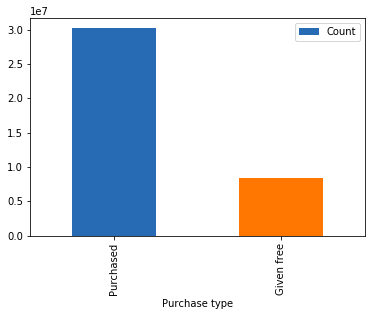

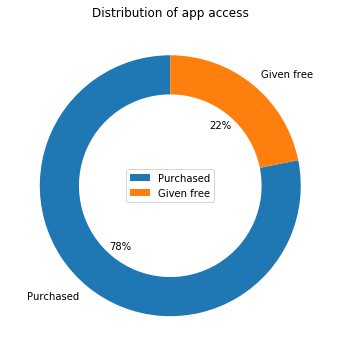

In [28]:
# Defining DataFrame to store the data
PurchaseType  = pd.DataFrame(columns = ['Purchase type', 'Count'])

# Extracting number of purchased apps
PurchasedCount = df[df['steam_purchase'] == True].shape[0]

# The rest are received for free
FreeCount = df.shape[0] - PurchasedCount

# Store the information to show it in tabular format
PurchaseType = PurchaseType.append({'Purchase type':'Purchased', 'Count':PurchasedCount},ignore_index = True )
PurchaseType = PurchaseType.append({'Purchase type':'Given free', 'Count':FreeCount},ignore_index = True )
            

# Showing the results in tabular and in plots
display(PurchaseType)

PurchaseType.plot(x = 'Purchase type', y = 'Count', kind = 'bar', color = ['#276bb5', '#ff7700'] )
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie([PurchasedCount, FreeCount ], labels = ['Purchased','Given free'], wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Distribution of app access')
plt.show()

We can see from the results that most of the applications have been purchased by the reviewers. 

# 3.2. RQ3

### 3.2.1. What is the most common time that authors review an application?

In order to answer this query we only need the times that those reviews have been submitted. The column 'timestamp_created' contains the information we need.

In [121]:
# Bring 'timestamp_created' column
RQ_2_1 = ['timestamp_created']
df = pd.read_csv(Datasets[-1], usecols = RQ_2_1)

As we only need the hour and the minute of the time of submission, so we just convert each value to its real time and then just take out the hour and the minute of that time. Then we just show the results. 

* To convert the time into what we need we wrote a function to give us the time in our desirable format. 

In [122]:
def ConvertTime(TimeStamp):
    TimeObject = datetime.fromtimestamp(TimeStamp)
    TimeStr = str(TimeObject.hour).zfill(2) + ":" + str(TimeObject.minute).zfill(2)
    return TimeStr

In [123]:
# Convert each timestamp to the format "HH:MM"
df['timestamp_created'] = df['timestamp_created'].apply(lambda x: ConvertTime(x))
df

,timestamp_created
0,10:21
1,14:46
2,07:32
3,23:13
4,16:18
...,...
38641165,19:05
38641166,19:04
38641167,19:04
38641168,19:03


Now after converting these timestamps, we check for each of them how many occurance we have in the dataset. 

In [124]:
# Count how many occurance is there for each specific time
TimeOccurance = df['timestamp_created'].value_counts()

# Store the information into dataframe to show them in tabular format. 
TimeOccurance = TimeOccurance.to_frame().reset_index()
display(TimeOccurance)

,index,timestamp_created
0,17:07,31069
1,17:05,31020
2,16:22,31018
3,16:25,31007
4,16:26,30951
...,...,...
1435,08:03,23438
1436,06:58,23411
1437,07:43,23381
1438,07:30,23333


In [125]:
# Show the most common time for writing reviews
TimeOccurance = TimeOccurance.rename(columns = {'index': 'Time', 'timestamp_created':'#Occurance'})
CommonTime = TimeOccurance[TimeOccurance['#Occurance'] == TimeOccurance['#Occurance'].max()]
display(CommonTime.style.set_caption('Most common time for review submission:'))

,Time,#Occurance
0,17:07,31069


In the result we found out that the most common time for submitting reviews was at 17:07. It looks like most of the reviewers were writing reviews in the afternoons.

### 3.2.2. Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals

The only thing we should do here is to just filter the rows that their submission time is between those intervals. 

In [8]:
def TimeIntervalCheck(TimeIntervals):
    
    # To store the results for each interval
    IntervalOccurance = pd.DataFrame(columns = ['TimeInterval','#Reviews' ])
    
    # Iterate over each interval and check how many reviews we had at that interval
    for i in TimeIntervals:
        Number = df[(df['timestamp_created']>= i[0]) & (df['timestamp_created'] <= i[1])].shape[0]
        
        # Append the result 
        IntervalOccurance = IntervalOccurance.append({'TimeInterval':" to ".join(i), '#Reviews':Number}, ignore_index = True)
    
    # Plot the results
    return IntervalOccurance

### 3.2.3. Use the function that you created in the previous literal to plot the number of reviews between the given intervals. 

We want to compute how many reviews were submitted in some intervals. So, again we bring the 'timestamp_created' column in which contains the time of reviews' submission. 

In [4]:
# Bring 'timestamp_created' column
RQ_2_2_Columns = ['timestamp_created']
df = pd.read_csv(Datasets[-1], usecols = RQ_2_2_Columns)

As our intervals were given in the format of HH:MM:SS, so this time we will convert the timestamps into this format to check their occurance. 

**In order to convert our timestamp to this format, we wrote a function to do this conversion for us.**

In [5]:
def ConvertTimeSecond(TimeStamp):
    TimeObject = datetime.fromtimestamp(TimeStamp)
    TimeStr = str(TimeObject.hour).zfill(2) + ":" + str(TimeObject.minute).zfill(2)+":"+str(TimeObject.second).zfill(2)
    return TimeStr

In [6]:
# Convert each timestamp to the format "HH:MM:SS"
df['timestamp_created'] = df['timestamp_created'].apply(lambda x: ConvertTimeSecond(x))
df

,timestamp_created
0,10:21:20
1,14:46:36
2,07:32:55
3,23:13:45
4,16:18:37
...,...
38641165,19:05:04
38641166,19:04:53
38641167,19:04:33
38641168,19:03:51


Then we will give the intervals to the function and receive the information. At the end we will plot the results. 

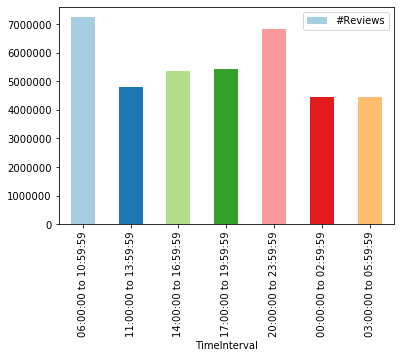

In [9]:
# Define intervals and plot the distribution of intervals
Times = [('06:00:00', '10:59:59'), ('11:00:00' ,'13:59:59'), ('14:00:00', '16:59:59'), 
         ('17:00:00', '19:59:59'), ('20:00:00', '23:59:59'), ('00:00:00', '02:59:59'), ('03:00:00', '05:59:59')]
TimeIntervalCheck(Times).plot(x = 'TimeInterval', y = '#Reviews', kind = 'bar', color=plt.cm.Paired(np.arange(7)))

As we can see in the plot, most of the reviews have been submitted between 6 am to 11 am. 

# 3.3 RQ4

### 3.3.1. What are the top 3 languages used to review applications?

To answer this query we only need to bring the 'language' column and check how many records do we have for each language in the dataset. 

In [3]:
# Bring 'language' column
df = pd.read_csv(Datasets[-1], usecols = ['language'])

Then we check how many occurance do we have for each of the languages. 

,language,#Occurance
0,english,16972923
1,schinese,6827292
2,russian,4157690
3,brazilian,1502728
4,spanish,1442311
5,german,1323367
6,turkish,1149019
7,koreana,1110791
8,french,955847
9,polish,878331


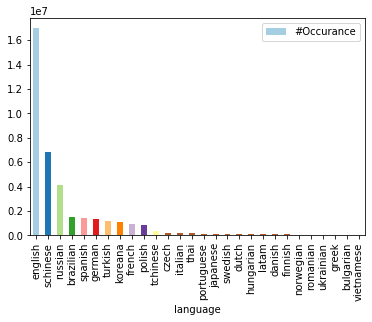

In [8]:
# Count how many reviews is there in each language
LanguageCount = df['language'].value_counts()
LanguageCount = pd.DataFrame(LanguageCount).reset_index()
LanguageCount.columns = ['language', '#Occurance'] 
display(LanguageCount.style.set_caption('Count of occurance of each language:'))
LanguageCount.plot(x = 'language', y = '#Occurance', kind = 'bar', color=plt.cm.Paired(np.arange(LanguageCount.shape[0])))

Then we will extract the first 3 most used languages and show them in tabular format and also in plot. 

,language,#Occurance
0,english,16972923
1,schinese,6827292
2,russian,4157690


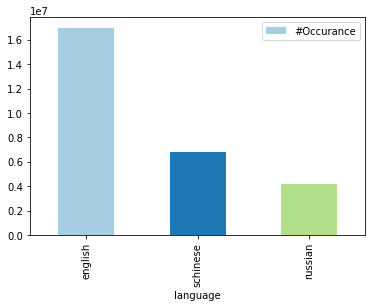

In [13]:
# Plot the first 3 most used languages in reviews
display(LanguageCount[:3].style.set_caption('Top 3 most used languages:'))
LanguageCount[:3].plot(x = 'language', y = '#Occurance', kind = 'bar', color=plt.cm.Paired(np.arange(3)))

* We can see the most used language in the reviews was English which is make sense as English nowadays is being used worldwide. 

### 3.3.2. Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

To implement this function we bring the dataset chunk by chunk and filter the reviews that are in those specified languages and yield them to the main where the function has been called. 

In [18]:
# Define the LanguageFilter function which filter reviews in a specific language
def LanguageFilter(Dataset, LanguageName):
    
    # Bring the dataset chunk by chunk
    for chunk in pd.read_csv(Dataset, chunksize = Chunksize):
        
        # Filter the records that have been written in provided languages
        yield chunk[chunk['language'].isin(LanguageName)]

### 3.3.3. Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In order to answer this question we will send the dataset and also the languages that we want to filter to the provided function. Then we will receive the results and check how many of those were voted as funny at least once. 

,Total reviews in all best third,Voted Funny
0,27957905,3301990


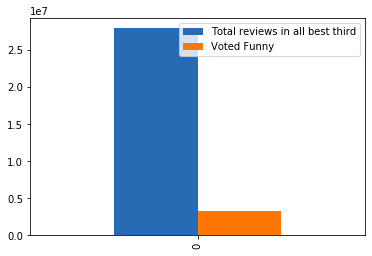

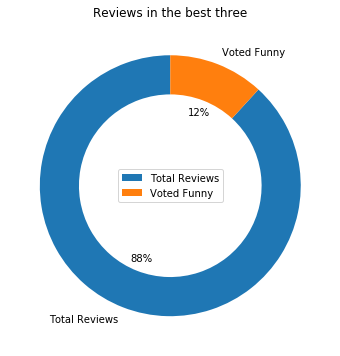

In [19]:
# Take the reviews that have been written in some specific language
# Then filter the ones that voted as funny
TotalNumberOfReviewsInThirdBest, VotedFunny = LanguageCount['#Occurance'][:3].sum(), 0

for i in LanguageFilter(Datasets[-1], LanguageCount['language'][:3]):
    # Check how many of the reviews have been voted as funny at least once
    VotedFunny += i[i['votes_funny'] > 0 ].shape[0]
        
# Showing information in tabular format        
TotalInThirdBest = pd.DataFrame(columns = ['Total reviews in all best third', 'Voted Funny'])
TotalInThirdBest = TotalInThirdBest.append({'Total reviews in all best third':TotalNumberOfReviewsInThirdBest, 
                                           'Voted Funny':VotedFunny }, ignore_index = True)
display(TotalInThirdBest.style.set_caption('Reviews in the best 3 languages'))

# Showing the results in a bar plot
TotalInThirdBest.plot(kind = 'bar', color = ['#276bb5', '#ff7700'])

# Showing information by plotting 
label, Size = ['Total Reviews', 'Voted Funny'], [TotalNumberOfReviewsInThirdBest - VotedFunny, VotedFunny]
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie(Size, labels = label, wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Reviews in the best three')
plt.show()

### 3.3.4. Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

With the same approach of previous query, this time we will count how many of the reviews in specific languages were voted at least once as helpful. 

,Total reviews in all best third,Voted Helpful
0,27957905,7866690


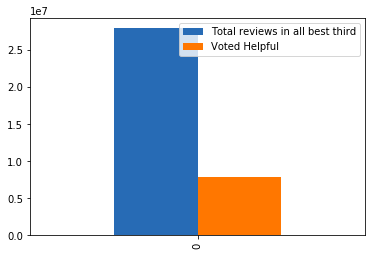

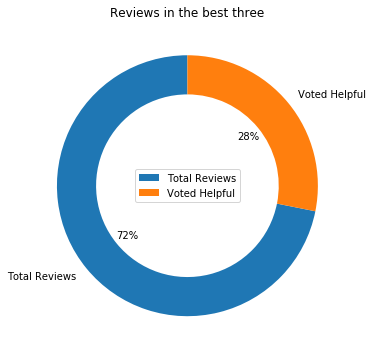

In [20]:
# Take the reviews that have been written in some specific language
# Then filter the ones that voted as helpful
TotalNumberOfReviewsInThirdBest, VotedHelpful = LanguageCount['#Occurance'][:3].sum(), 0

for i in LanguageFilter(Datasets[-1], LanguageCount['language'][:3]):
    
    # Check how many of the reviews have been voted as helpful at least once
    i = i[i['votes_helpful'] > 0]
    VotedHelpful += i.shape[0]
        
# Showing information in tabular format
TotalInThirdBest = pd.DataFrame(columns = ['Total reviews in all best third', 'Voted Helpful'])
TotalInThirdBest = TotalInThirdBest.append({'Total reviews in all best third':TotalNumberOfReviewsInThirdBest, 
                                           'Voted Helpful':VotedHelpful }, ignore_index = True)
display(TotalInThirdBest.style.set_caption('Reviews in the best 3 languages'))

# Showing the results in a bar plot
TotalInThirdBest.plot(kind = 'bar', color = ['#276bb5', '#ff7700'])

# Showing information by plotting 
label, Size = ['Total Reviews', 'Voted Helpful'], [TotalNumberOfReviewsInThirdBest - VotedHelpful, VotedHelpful]
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie(Size, labels = label, wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Reviews in the best three')
plt.show()

# 3.4. RQ5

### 3.4.1. Plot the top 10 most popular reviewers and the number of reviews.

* Popular metric: we assumed that the reviewers that had the most number of reviews are more popular than the others. 

To answer this query we only need to check how many times each reviewer id occured in the dataset. We can find the id of each author in 'author.steamid' column. 

In [6]:
# Bring 'author.steamid' column which specify who wrote a specific review
df = pd.read_csv(Datasets[-1], usecols = ['author.steamid'])

Then we will check how many times each of these ids have been occured in the dataset. 

In [19]:
# We count how many reviews each reviewer wrote
df['author.steamid'] = df['author.steamid'].apply(lambda x: int(x))
ReviewerCount = df['author.steamid'].value_counts().to_frame().reset_index()

# Give labels to the columns
ReviewerCount.columns = ['Reviewer', '#Reviews'] 
display(ReviewerCount)

,Reviewer,#Reviews
0,76561198062813904,149
1,76561198315585536,132
2,76561198239163744,106
3,76561198192166880,104
4,76561198045381872,103
...,...,...
16617312,76561198277347968,1
16617313,76561198422707568,1
16617314,76561198100930944,1
16617315,76561198966553536,1


Now we will print the first 10 most popular reviewers

,Reviewer,#Reviews
0,76561198062813904,149
1,76561198315585536,132
2,76561198239163744,106
3,76561198192166880,104
4,76561198045381872,103
5,76561198064946144,100
6,76561198013146400,98
7,76561198027973296,94
8,76561197969749888,88
9,76561197989746992,86


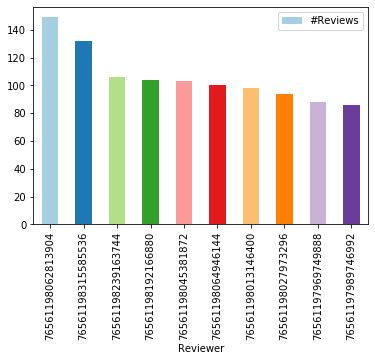

In [20]:
# Now we plot the first 10 popular reviewers
# In tabular format
display(ReviewerCount[:10].style.set_caption('10 most popular reviewers'))
# By plotting 
ReviewerCount[:10].plot(x = 'Reviewer' , y = '#Reviews', kind = 'bar', color=plt.cm.Paired(np.arange(10)))

We found out that the reviewer with id '76561198062813904' has submitted more reviews comparing to others. 

### 3.4.2. What applications did the most popular author review

To answer this query we will use the result that we got in the last query and go through records and extract the applications that this reviewer has submitted a review for. 

So we bring two columns which specify the application's name and also the id of the reviewer.

In [22]:
# Bring 'app_name' and 'author.steamid' 
df = pd.read_csv(Datasets[-1], usecols = ['app_name', 'author.steamid'])

In [33]:
# Extract the applications that the most popular reviewer wrote a review for
ReviewedByMostPopular = df[df['author.steamid'] == ReviewerCount['Reviewer'][0]]

# Check for each application how many reviews he has submitted
ReviewedByMostPopular = ReviewedByMostPopular['app_name'].value_counts().to_frame().reset_index()

ReviewedByMostPopular.columns = ['Application name', '#Reviews'] 
display(ReviewedByMostPopular.style.set_caption('Applications reviewed by most popular reviewer'))


,Application name,#Reviews
0,Hollow Knight,2
1,Half-Life,1
2,Kingdom Come: Deliverance,1
3,ARK: Survival Evolved,1
4,No Man's Sky,1
5,Frostpunk,1
6,Fallout 4,1
7,DARK SOULS™ III,1
8,Rise of the Tomb Raider,1
9,Middle-earth™: Shadow of War™,1


### 3.4.3. How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

To answer this question we should have the information of the purchase type and also about the reviewer. So, we bring the suitable columns. 

* As we mentioned in one of the previous queries, we will assume the rows that have of 'steam_purchase' equal to true as the purchased ones and given for free the ones that have this valuse as False. 

In [34]:
# Bring 'author.steamid', 'steam_purchase' and 'received_for_free'columns
df = pd.read_csv(Datasets[-1], usecols = ['author.steamid', 'steam_purchase'])

Then we will filter the rows that are for the most popular reviewer

In [39]:
# Filter the rows that the most popular reviewer submitted
df = df[df['author.steamid'] == ReviewerCount['Reviewer'][0]]
display(df)

,steam_purchase,received_for_free,author.steamid
17464700,True,False,7.656120e+16
17490689,True,False,7.656120e+16
17609255,True,False,7.656120e+16
17799501,True,False,7.656120e+16
18497386,True,False,7.656120e+16
...,...,...,...
38472241,True,False,7.656120e+16
38518940,False,False,7.656120e+16
38545036,True,False,7.656120e+16
38550307,True,False,7.656120e+16


,Purchased,Received for Free
0,110,39


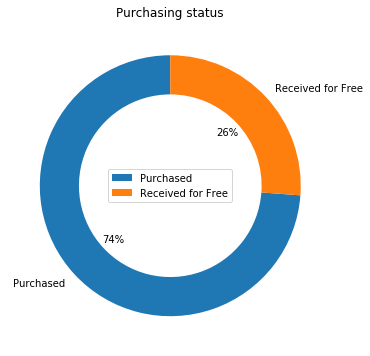

In [43]:
# Extract the number of purchased apps
NumberOfPurchased = df[df['steam_purchase'] == True].shape[0]

# Get the number of given for free apps
NumberOfFree = df.shape[0] - NumberOfPurchased

# Visualize the result in tabular format
BestReviewerPurchase = pd.DataFrame(columns = ['Purchased', 'Received for Free'])
BestReviewerPurchase = BestReviewerPurchase.append({'Purchased':NumberOfPurchased, 'Received for Free':NumberOfFree }, ignore_index = True)
display(BestReviewerPurchase.style.set_caption('Purchasing status of the most popular reviewer:'))

# Ploting the percentage of the purchasing status
label, Size = ['Purchased', 'Received for Free'], [NumberOfPurchased, NumberOfFree]
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie(Size, labels = label, wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Purchasing status')
plt.show()

### 3.4.4. How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

* Positive/Negative review: We assume that when the reviewer has recommended the application, he wrote a positive review for that application as well and negative vise versa. 

#### 3.4.4.1 Purchased applications 

To answer this query we should bring three columns 'author.steamid', 'steam_purchase' and 'recommended'. We have seen the usage of the first two columns before. We use 'recommended' column to check if the reviewer recomended the application or not. 

In [45]:
# Bring 'author.steamid', 'steam_purchase', 'received_for_free' and 'recommended' columns 
df = pd.read_csv(Datasets[-1], usecols = ['author.steamid', 'steam_purchase', 'recommended'])

The we extract the reviewers which has been submitted by the most popular reviewer. 

In [46]:
# Filter the rows that the most popular reviewer submitted
df = df[df['author.steamid'] == ReviewerCount['Reviewer'][0]]
display(df)

,recommended,steam_purchase,received_for_free,author.steamid
17464700,True,True,False,7.656120e+16
17490689,True,True,False,7.656120e+16
17609255,True,True,False,7.656120e+16
17799501,True,True,False,7.656120e+16
18497386,True,True,False,7.656120e+16
...,...,...,...,...
38472241,True,True,False,7.656120e+16
38518940,True,False,False,7.656120e+16
38545036,True,True,False,7.656120e+16
38550307,True,True,False,7.656120e+16


Now to extract the reviews for applications that has been purchased, we shoud check for the one that have 'steam_purchase' column equal True

In [47]:
PurchasedAppsByMostPopular = df[df['steam_purchase'] == True]
display(PurchasedAppsByMostPopular)

,recommended,steam_purchase,received_for_free,author.steamid
17464700,True,True,False,7.656120e+16
17490689,True,True,False,7.656120e+16
17609255,True,True,False,7.656120e+16
17799501,True,True,False,7.656120e+16
18497386,True,True,False,7.656120e+16
...,...,...,...,...
38340524,True,True,False,7.656120e+16
38472241,True,True,False,7.656120e+16
38545036,True,True,False,7.656120e+16
38550307,True,True,False,7.656120e+16


Then the ones that have 'recommended' columns as True are positive reviews and the ones that have this value as False are negative reviews. 

,Positive,Negative
0,108,2


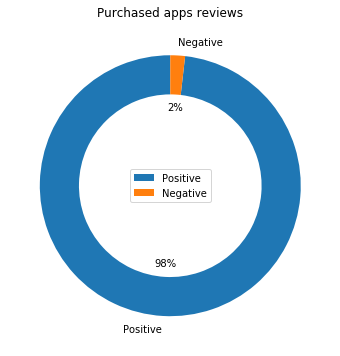

In [50]:
# Distinguish positive and negative reviews
PositiveReviews = PurchasedAppsByMostPopular[PurchasedAppsByMostPopular['recommended'] == True].shape[0]
NegativeReviews = PurchasedAppsByMostPopular[PurchasedAppsByMostPopular['recommended'] == False].shape[0]

# Show them in tabular format
PurchaseReview = pd.DataFrame(columns = ['Positive', 'Negative'])
PurchaseReview = PurchaseReview.append({'Positive':PositiveReviews
                                        ,'Negative':NegativeReviews }, ignore_index = True)
display(PurchaseReview.style.set_caption('Purchased apps reviews:'))

# Plotting the recommendation status of purchased apps
label, Size = ['Positive', 'Negative'], [PositiveReviews, NegativeReviews]
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie(Size, labels = label, wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Purchased apps reviews')
plt.show()

#### 3.4.4.2 Free applications

We filter the rows of the applications that reviewer received them for free. 

In [51]:
FreeAppsByMostPopular = df[df['steam_purchase'] != False]
display(FreeAppsByMostPopular)

,recommended,steam_purchase,received_for_free,author.steamid
19198868,True,False,False,7.656120e+16
19653008,True,False,False,7.656120e+16
19857972,True,False,False,7.656120e+16
20470019,True,False,False,7.656120e+16
20911858,True,False,False,7.656120e+16
...,...,...,...,...
37817232,True,False,False,7.656120e+16
37934479,True,False,False,7.656120e+16
38179300,True,False,False,7.656120e+16
38234281,False,False,False,7.656120e+16


Then the ones that have 'recommended' columns as True are positive reviews and the ones that have this value as False are negative reviews. 

,Positive,Negative
0,38,1


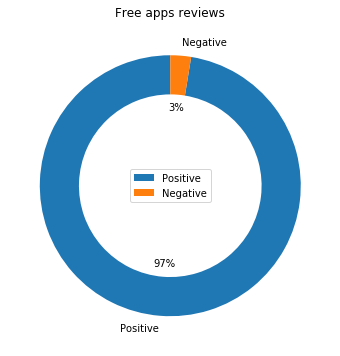

In [52]:
# Distinguish positive and negative reviews
PositiveReviews = FreeAppsByMostPopular[FreeAppsByMostPopular['recommended'] == True].shape[0]
NegativeReviews = FreeAppsByMostPopular[FreeAppsByMostPopular['recommended'] == False].shape[0]

# Show them in tabular format
FreeReview = pd.DataFrame(columns = ['Positive', 'Negative'])
FreeReview = FreeReview.append({'Positive':PositiveReviews
                                        ,'Negative':NegativeReviews }, ignore_index = True)
display(FreeReview.style.set_caption('Free apps reviews:'))

# Plotting the recommendation status of purchased apps
label, Size = ['Positive', 'Negative'], [PositiveReviews, NegativeReviews]
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.pie(Size, labels = label, wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Free apps reviews')
plt.show()

# 3.5. RQ6

### 3.5.1. What is the average time (days and minutes) a user lets pass before he updates a review?

To answer this query we should use two columns 'timestamp_created', 'timestamp_updated' which contain the creation time of the review and the time the review has been updated. 

In [34]:
# Bring 'timestamp_created' and 'timestamp_updated' columns
df = pd.read_csv(Datasets[-1], usecols = ['timestamp_created', 'timestamp_updated'])

We will consider only those reviews that have been updated

In [35]:
# Here we will extract the reviews that have been revised 
df = df[df['timestamp_created'] != df['timestamp_updated']]
display(df)

,timestamp_created,timestamp_updated
6,1.550493e+09,1.568183e+09
11,1.137763e+09,1.144433e+09
17,1.160874e+09,1.164114e+09
19,1.062027e+09,1.064436e+09
23,1.480008e+09,1.487476e+09
...,...,...
38641155,1.584987e+09,1.585590e+09
38641156,1.584987e+09,1.584990e+09
38641161,1.584987e+09,1.585125e+09
38641168,1.584987e+09,1.586382e+09


Here we write a function which receive a timestamp as an argument and return a time object. 

In [36]:
def ConvertToDate(Timestamp):
    return datetime.fromtimestamp(Timestamp)

Then we try to convert each of the columns 'timestamp_created', 'timestamp_updated' to their corresponded data object. 

In [37]:
df['timestamp_created'] = df['timestamp_created'].apply(lambda x:ConvertToDate(x))
df['timestamp_updated'] = df['timestamp_updated'].apply(lambda x:ConvertToDate(x))
display(df)

,timestamp_created,timestamp_updated
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203
...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000


Then we should check how much time it took for each of these reviews to be updated.

In [38]:
# We will add a new column named 'Time_difference' which stores the time difference between the times for
# each row 
df['Time_difference'] = df['timestamp_updated'] - df['timestamp_created']
display(df)

,timestamp_created,timestamp_updated,Time_difference
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558,204 days 18:46:03.913558
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252,77 days 05:52:18.793252
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840,37 days 11:10:44.663840
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568,27 days 21:15:00.747568
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203,86 days 10:39:41.196203
...,...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000,7 days 00:24:08
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000,0 days 00:48:28
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000,1 days 14:31:12
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000,16 days 04:43:11


Now we check the average time that took a reviwer to update his review. 

In [77]:
# Here we will check a summary of the values in this column 
display(df['Time_difference'].describe().to_frame().style.set_caption('Time difference distribution:'))

# Here we get the average of the time differences
AverageTimeDifference = df['Time_difference'].mean()

# Then we will represent how many days and how many minutes it took to update a review in average. 

# As we need to specify how many minutes, so we should convert the seconds to minutes as well.
Minutes = AverageTimeDifference.seconds//60
InDayAndMin = pd.DataFrame({'#Days': [AverageTimeDifference.days], '#Minutes':[Minutes]}).astype('int32')  
display(InDayAndMin.style.set_caption('Average time needed for a review to be updated:'))


,Time_difference
count,5837112
mean,184 days 01:11:40.174410628
std,309 days 22:38:56.383916652
min,-1 days +23:00:58
25%,30 days 03:58:14.377942250
50%,86 days 08:56:03.193336
75%,158 days 11:28:43.987398250
max,8069 days 20:08:16


,#Days,#Minutes
0,184,71


* We realized that the minimum time difference here is a negative value. Probably there were some issues when writing information to the dataset. Even we checked the time difference even with absolute time difference and the result didn't change so we consider that values as noises. 

### 3.5.2. Plot the top 3 authors that usually update their reviews.

For this query we should bring for each review 'author.steamid', 'timestamp_created', 'timestamp_updated' values.

In [63]:
# Bring 'author.steamid', 'timestamp_created' and 'timestamp_updated'
df = pd.read_csv(Datasets[-1], usecols = ['author.steamid', 'timestamp_created', 'timestamp_updated'])

Then we filter the reviewers who have updated their reviews.

In [64]:
df = df[df['timestamp_created'] != df['timestamp_updated']]
display(df)

,timestamp_created,timestamp_updated,author.steamid
6,1.550493e+09,1.568183e+09,7.656120e+16
11,1.137763e+09,1.144433e+09,7.656120e+16
17,1.160874e+09,1.164114e+09,7.656120e+16
19,1.062027e+09,1.064436e+09,7.656120e+16
23,1.480008e+09,1.487476e+09,7.656120e+16
...,...,...,...
38641155,1.584987e+09,1.585590e+09,7.656120e+16
38641156,1.584987e+09,1.584990e+09,7.656120e+16
38641161,1.584987e+09,1.585125e+09,7.656120e+16
38641168,1.584987e+09,1.586382e+09,7.656120e+16


We should check how many times each reviewer updated his reviews. 

In [67]:
# Check how many times each reviewer id has been repeated
UserRevisions = df['author.steamid'].value_counts()
UserRevisions = UserRevisions.to_frame().reset_index()
UserRevisions.columns = ['Reviewer', '#Updated Reviews']
UserRevisions['Reviewer'] = UserRevisions['Reviewer'].apply(lambda x: int(x))
display(UserRevisions)

,Reviewer,#Updated Reviews
0,76561198192166880,92
1,76561198206999968,63
2,76561198072450800,60
3,76561197997059776,59
4,76561197999935168,58
...,...,...
4234071,76561197882527952,1
4234072,76561197957881216,1
4234073,76561197948445328,1
4234074,76561197922188144,1


Take top 3 reviewers that updated their reviews the most. 

,Reviewer,#Updated Reviews
0,76561198192166880,92
1,76561198206999968,63
2,76561198072450800,60


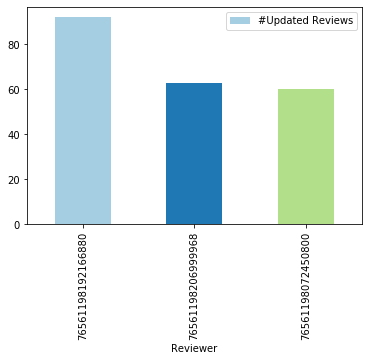

In [72]:
# Top 3 reviewers in review updating 
display(UserRevisions[:3])
display(UserRevisions[:3].plot(kind = 'bar', x = 'Reviewer', y = '#Updated Reviews' , color=plt.cm.Paired(np.arange(3))))

# 3.6. RQ7

### 3.6.1. What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

How do we compute the probability here: <br/>
We will check how many reviews has their Weighted Vote Score equal or bigger than 0.5. Then divide them by the number of all reviews. 

So basically it's the number of favorable cases divided by all the cases. 

In order to answer this query we will bring just the column 'weighted_vote_score' and filter the suitable ones to extract the favorable cases and then divide them by all the reviews that we have. 

In [4]:
# Bring the 'weighted_vote_score' column 
df = pd.read_csv(Datasets[-1], usecols = ['weighted_vote_score'])

Now we filter the reviews that satisfy this condition. 

In [5]:
FavorableCases = df[df['weighted_vote_score'] >= .5]

In [10]:
# Now we just compute the probability of the reviews that satisfy this condition
Probability = FavorableCases.shape[0]/df.shape[0]

ProbVisualize = pd.DataFrame({'All cases': df.shape[0], 
                              'Favorable cases':[FavorableCases.shape[0]], 'Probability': [Probability]}) 
display(ProbVisualize.style.set_caption('Probability of a review has a weighted vote score >= 0.5:'))

,All cases,Favorable cases,Probability
0,38641170,8413221,0.217727


### 3.6.2. What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

Here we have a conditional probability as we should compute the probabilty of the reviews that have at least 1 vote as funny given the weighted vote score > 0.5

We know that we can calculate the conditional probability like this: <br />
P(B|A) = P(A and B) / P(A)

So in order to answer this query we should check the number of rows that safisfy both of these conditions and then divide the result by the number of reviews that have weighted vote score > 0.5

So here we should have both 'votes_funny' and 'weighted_vote_score' columns. 

In [40]:
# Bring the 'votes_funny' and 'weighted_vote_score' column 
df = pd.read_csv(Datasets[-1], usecols = ['votes_funny', 'weighted_vote_score'])

We get the number of reviews that have weighted vote score > 0.5 

In [47]:
WeightedVote = df[df['weighted_vote_score'] > .5].shape[0]

Then we get the number of reviews that have at least one vote as funny and also weighted vote score > 0.5

In [48]:
BothConditions = df[(df['votes_funny'] > 0 ) & (df['weighted_vote_score'] > .5)].shape[0]

Now we calculate the conditional probabilty. 

In [49]:
# Probability of having both of these conditions
ProbOfBoth = BothConditions/df.shape[0]

# Probability of have weighted vote score more than 0.5
ProbOfWeightedVoteScore = WeightedVote/df.shape[0]

# The conditional probability
ConditionalProb = ProbOfBoth/ProbOfWeightedVoteScore

In [50]:
ConditionalProbVisualize = pd.DataFrame({'All the cases':[df.shape[0]],
                                         'Satisfy weighted vote score':[WeightedVote],
                                         'Satisfy both conditions': [BothConditions], 
                                         'P(weighted vote score)': [ProbOfWeightedVoteScore], 
                                         'P(Both)': [ProbOfBoth],
                                         'Conditional probability': [ConditionalProb]}) 
display(ConditionalProbVisualize.style.set_caption('Probability of a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5:'))

,All the cases,Satisfy weighted vote score,Satisfy both conditions,P(weighted vote score),P(Both),Conditional probability
0,38641170,8164225,1557416,0.211283,0.040305,0.190761


### 3.6.3. Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

Here we should check if these two events are independent from each other or not. 

We can say two events are independent from each other when: <br/>
P(A and B) = P(A) P(B)

In order to answer this query, we should go through the records and extract the ones that have at least one vote as funny, the number of the records that have weighted vote score >= 0.5 and also the number of records that satisfy both of these two conditions. 

So here we should have both 'votes_funny' and 'weighted_vote_score' columns. 

In [ ]:
# Bring the 'votes_funny' and 'weighted_vote_score' column 
df = pd.read_csv(Datasets[-1], usecols = ['votes_funny', 'weighted_vote_score'])

Then we get the number of reviews that have weighted vote score >= 0.5

In [51]:
WeightedVote = df[df['weighted_vote_score'] >= .5].shape[0]

Extract the number of reviews that have at least one vote as funny. 

In [52]:
FunnyVote = df[df['votes_funny'] > 0 ].shape[0]

Extract the number of reviews that have satisfy both of these conditions. 

In [53]:
BothConditions = df[(df['votes_funny'] > 0 ) & (df['weighted_vote_score'] >= .5)].shape[0]

And now we compute their probability.

In [54]:
WeightedVoteProb = WeightedVote / df.shape[0]
FunnyVoteProb = FunnyVote / df.shape[0]
BothConditionsProb = BothConditions / df.shape[0]

Now we can check if these two event are independent from each other or not. 

In [55]:
ConditionalProbVisualize = pd.DataFrame({'All the cases':[df.shape[0]],
                                         'Satisfy weighted vote score':[WeightedVote],
                                         'Safisty voted funny': [FunnyVote], 
                                         'Satisfy both conditions': [BothConditions], 
                                         'P(weighted vote score)': [WeightedVoteProb], 
                                         'P(voted funny)': [FunnyVoteProb], 
                                         'P(Both)': [BothConditionsProb], 
                                         'P(weighted vote score) * P(voted funny)':[WeightedVoteProb * FunnyVoteProb], 
                                         'Independent events?': [BothConditionsProb == (WeightedVoteProb * FunnyVoteProb)]}) 
display(ConditionalProbVisualize.style.set_caption('Checking the independence of two events:'))

,All the cases,Satisfy weighted vote score,Safisty voted funny,Satisfy both conditions,P(weighted vote score),P(voted funny),P(Both),P(weighted vote score) * P(voted funny),Independent events?
0,38641170,8413221,4513236,1601771,0.217727,0.116799,0.041452,0.025430,False


* We discoved that these two events are not independent from each other. It means that affecting one of these values should have an impact on the other event as well. 

# 3.7 RQ8

### 3.7.1. Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [13]:
# Bring 'language' and 'weighted_vote_score' columns 
Columns = ['language', 'weighted_vote_score',"votes_helpful","recommended"]
dfRQ8 = pd.read_csv(Datasets[-1], usecols = Columns)

Let's first take a look at the descriptive statistics of our columns to have a general view.

In [14]:
# Descriptive Statistics for all languages
dfRQ8.describe().T

,count,mean,std,min,25%,50%,75%,max
votes_helpful,38641170.0,455272.356188,1.415027e+09,0.0,0.0,0.0,1.00,4.398047e+12
weighted_vote_score,38641170.0,0.162416,2.421740e-01,0.0,0.0,0.0,0.48,9.959868e-01


In [17]:
# Descriptive Statistics for Chinese
display(dfRQ8[dfRQ8['language'] == "schinese"]['weighted_vote_score'].describe().to_frame().T)

,count,mean,std,min,25%,50%,75%,max
weighted_vote_score,6827292.0,0.140735,0.236641,0.0,0.0,0.0,0.466321,0.995987


In [18]:
# Descriptive Statistics for Russian
display(dfRQ8[dfRQ8['language'] == "russian"]['weighted_vote_score'].describe().to_frame().T)

,count,mean,std,min,25%,50%,75%,max
weighted_vote_score,4157690.0,0.211863,0.257447,0.0,0.0,0.0,0.505173,0.989523


Before starting the AB test, we first checked the distribution of the data in order to understand and pre-process the data correctly. 

While checking whether our data set has a normal distribution, we realized that our distribution actually contains too many outlier values.

Test Stat = 0.5867, p-value = 0.000000000000000


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


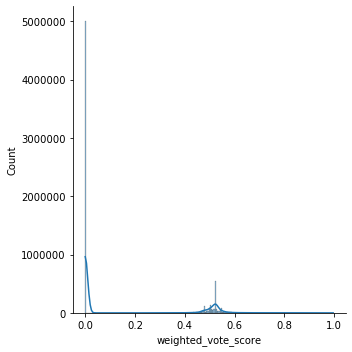

In [20]:
ChineseWeighted = dfRQ8[dfRQ8['language'] == "schinese"]['weighted_vote_score']
test_stat, pvalue = shapiro(ChineseWeighted)
print('Test Stat = %.4f, p-value = %.15f' % (test_stat, pvalue))
sns.displot(ChineseWeighted, kde=True)

/home/mehrdad/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test Stat = 0.6895, p-value = 0.000000000000000


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


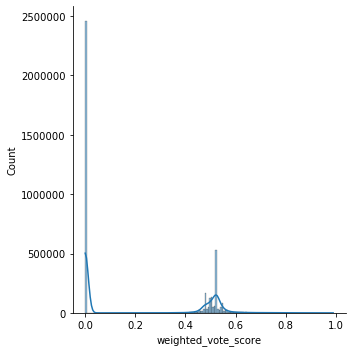

In [21]:
RussianWeighted = dfRQ8[dfRQ8['language'] == "russian"]['weighted_vote_score']
test_stat, pvalue = shapiro(RussianWeighted)
print('Test Stat = %.4f, p-value = %.15f' % (test_stat, pvalue))
sns.displot(RussianWeighted, kde=True)

As you can see below, some reviews actually have "0" helpful votes. In other words, the user did not actually vote, but the weighted vote score was filled with 0 or another value according to the weight formula on the back and added to the data set. 

So, it doesn't make sense to examine the rows that don't have an upvote in the data. We decided to delete these values in order to establish a correct hypothesis and reach the correct test results. We removed only the records that these two values are equal to 0 at the same time. 

In [22]:
dfRQ8.tail(20)

,language,recommended,votes_helpful,weighted_vote_score
38641150,schinese,True,1,0.000000
38641151,schinese,True,1,0.506245
38641152,english,True,6,0.404825
38641153,english,True,5,0.470173
38641154,russian,True,3,0.518157
38641155,english,True,0,0.191392
38641156,english,True,14,0.619158
38641157,english,True,0,0.471698
38641158,english,True,0,0.000000
38641159,english,True,0,0.000000


Here we are removing the records that have these two values equal to 0 at the same time because we wanted to concentrate on the records that give us much more valuable information. 

In [25]:
FilteredBothEqualZero =  dfRQ8.copy()
FilteredBothEqualZero.drop(dfRQ8[(dfRQ8["votes_helpful"] == 0) & (dfRQ8["weighted_vote_score"] == 0)].index, inplace=True)
FilteredBothEqualZero

,language,recommended,votes_helpful,weighted_vote_score
11,russian,True,1,0.000000
14,koreana,True,2,0.000000
16,schinese,True,1,0.000000
17,schinese,True,1,0.000000
19,schinese,True,1,0.000000
...,...,...,...,...
38641161,spanish,True,1,0.521739
38641164,spanish,True,87,0.847315
38641167,english,True,0,0.474138
38641168,english,True,0,0.386022


In [27]:
FilteredBothEqualZero.describe().astype('str').T

,count,mean,std,min,25%,50%,75%,max
votes_helpful,15822693.0,1111837.062865468,2211309702.675611,0.0,0.0,1.0,2.0,4398046511106.0
weighted_vote_score,15822693.0,0.3966415210060412,0.22432879448644788,0.0,0.4087549746036529,0.5020747184753418,0.523809552192688,0.995986759662628


In [28]:
# Descriptive Statistics for Chinese
dfRQ8_vote_filtered_Chinese = FilteredBothEqualZero[FilteredBothEqualZero['language'] == 'schinese' ]
dfRQ8_vote_filtered_Chinese.describe().T

,count,mean,std,min,25%,50%,75%,max
votes_helpful,2520906.0,6.204912,81.037013,0.0,0.0,1.000000,2.00000,26149.000000
weighted_vote_score,2520906.0,0.381149,0.245004,0.0,0.0,0.503817,0.52381,0.995987


In [29]:
# Descriptive Statistics for Russian
dfRQ8_vote_filtered_Russian = FilteredBothEqualZero[FilteredBothEqualZero['language'] == 'russian' ]
dfRQ8_vote_filtered_Russian.describe().T

,count,mean,std,min,25%,50%,75%,max
votes_helpful,2036084.0,4.104665,48.975581,0.0,0.00000,1.000000,2.00000,18030.000000
weighted_vote_score,2036084.0,0.432625,0.199586,0.0,0.47619,0.507389,0.52381,0.989523


At the end of the preprocessing, the average weighted_vote_score of our 2520906 rows is "0.381149" for Chinese.
\
For the Russian dataset containing 2036084 rows, the average weighted_vote_score is "0.432625".

##### AB Testing (Independent Two-Sample T-Test)

AB Testing is used when it is desired to make a comparison between the mean of two groups.

 1. Assumption Check
    -  Normality Assumption
    -  Variance Homogeneity
 2. Implementation of the Hypothesis
   -  Independent two-sample t-test if assumptions are met (parametric test)
   -  Mannwhitneyu test if assumptions are not provided (non-parametric test)
   
 Not:
 
 In cases where the assumption of normality is not met, non-parametric testing is applied.
 In cases where variance homogeneity is not provided, an argument (equal_var=False) is entered for the parametric test.

In [30]:
# Showing the mean of Weigheted Vote Scores for Chinese and Russian
Mean_WVS = [dfRQ8_vote_filtered_Chinese['weighted_vote_score'].mean(),dfRQ8_vote_filtered_Russian['weighted_vote_score'].mean()]
Languages = ['Chinese', 'Russian']
MeanOfWeightedVoteScores = pd.DataFrame(Mean_WVS,Languages)
MeanOfWeightedVoteScores = MeanOfWeightedVoteScores.reset_index()
MeanOfWeightedVoteScores.columns = ['Languages', 'Mean of Weighted Vote Scores'] 
MeanOfWeightedVoteScores = MeanOfWeightedVoteScores.style.set_caption('The mean of Weigheted Vote Scores for Chinese and Russian')
display(MeanOfWeightedVoteScores)

,Languages,Mean of Weighted Vote Scores
0,Chinese,0.381149
1,Russian,0.432625


#### Hypothesis

Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

* H0 : There is a significant difference in the Weighted Vote Score of reviews.   (μ1 = μ2)
* H1 : There is not a significant difference in the Weighted Vote Score of reviews.  (μ1 != μ2)

/home/mehrdad/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test Stat = 0.7257, p-value = 0.000000000000000


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


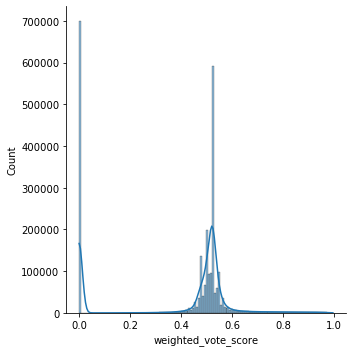

In [31]:
test_stat, pvalue = shapiro(dfRQ8_vote_filtered_Chinese['weighted_vote_score'])
print('Test Stat = %.4f, p-value = %.15f' % (test_stat, pvalue))
sns.displot(dfRQ8_vote_filtered_Chinese['weighted_vote_score'], kde=True)

/home/mehrdad/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test Stat = 0.6665, p-value = 0.000000000000000


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


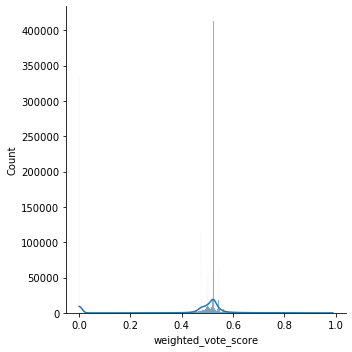

In [32]:
test_stat, pvalue = shapiro(dfRQ8_vote_filtered_Russian['weighted_vote_score'])
print('Test Stat = %.4f, p-value = %.15f' % (test_stat, pvalue))
sns.displot(dfRQ8_vote_filtered_Russian['weighted_vote_score'], kde=True)

As in the previous sections we saw that records for Russian and Chinese don't have a normal distribution. So normality assumptions were not preserved.

### 2. Implementation of the Hypothesis -  Mann–Whitney U test
Our assumptions are not provided, so we have to apply non-parametric test.

In [33]:
test_stat, pvalue = mannwhitneyu(dfRQ8_vote_filtered_Chinese['weighted_vote_score'],dfRQ8_vote_filtered_Russian['weighted_vote_score'])
print('Test Stat = %.4f, p-value = %.10f' % (test_stat, pvalue))

Test Stat = 2392478571023.5000, p-value = 0.0000000000


Since, p-value is less than 0.05, **H0 CANNOT BE REJECTED**, Therefore, we can say that there is **NO** statistically significant difference between the means of the two groups.

### 3.7.2. Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

Here we will use the review that had an update and check the relationship between the time and weighted vote score. 

In order to do this we will bring the appropriate columns. 

In [65]:
# Bring 'timestamp_created', 'timestamp_updated', 'weighted_vote_score' and 'recommended' columns which is 
# useful to answer the next question. 
df = pd.read_csv(Datasets[-1], usecols = ['timestamp_created', 'timestamp_updated', 'weighted_vote_score', 'recommended'])

Then we filter the reviews that had an update. 

In [66]:
# Here we will extract the reviews that have been revised 
df = df[df['timestamp_created'] != df['timestamp_updated']]
display(df)

,timestamp_created,timestamp_updated,recommended,weighted_vote_score
6,1.550493e+09,1.568183e+09,True,0.000000
11,1.137763e+09,1.144433e+09,True,0.000000
17,1.160874e+09,1.164114e+09,True,0.000000
19,1.062027e+09,1.064436e+09,True,0.000000
23,1.480008e+09,1.487476e+09,True,0.523810
...,...,...,...,...
38641155,1.584987e+09,1.585590e+09,True,0.191392
38641156,1.584987e+09,1.584990e+09,True,0.619158
38641161,1.584987e+09,1.585125e+09,True,0.521739
38641168,1.584987e+09,1.586382e+09,True,0.386022


Then we will convert the timestamps to the real time. 

In [67]:
df['timestamp_created'] = df['timestamp_created'].apply(lambda x:ConvertToDate(x))
df['timestamp_updated'] = df['timestamp_updated'].apply(lambda x:ConvertToDate(x))
display(df)

,timestamp_created,timestamp_updated,recommended,weighted_vote_score
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558,True,0.000000
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252,True,0.000000
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840,True,0.000000
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568,True,0.000000
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203,True,0.523810
...,...,...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000,True,0.191392
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000,True,0.619158
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000,True,0.521739
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000,True,0.386022


Then we will produce another column named 'Time_difference' to store the time took to update a review. 

In [68]:
# We will add a new column named 'Time_difference' which stores the time difference between the times for
# each row 
df['Time_difference'] = df['timestamp_updated'] - df['timestamp_created']
display(df)

,timestamp_created,timestamp_updated,recommended,weighted_vote_score,Time_difference
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558,True,0.000000,204 days 18:46:03.913558
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252,True,0.000000,77 days 05:52:18.793252
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840,True,0.000000,37 days 11:10:44.663840
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568,True,0.000000,27 days 21:15:00.747568
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203,True,0.523810,86 days 10:39:41.196203
...,...,...,...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000,True,0.191392,7 days 00:24:08
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000,True,0.619158,0 days 00:48:28
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000,True,0.521739,1 days 14:31:12
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000,True,0.386022,16 days 04:43:11


Here you can see the values of of the 'Time_difference' column. 

In [69]:
# We need to use "Time_difference" column which we created in the Ouestion 6.
display(df["Time_difference"].to_frame())

,Time_difference
6,204 days 18:46:03.913558
11,77 days 05:52:18.793252
17,37 days 11:10:44.663840
19,27 days 21:15:00.747568
23,86 days 10:39:41.196203
...,...
38641155,7 days 00:24:08
38641156,0 days 00:48:28
38641161,1 days 14:31:12
38641168,16 days 04:43:11


We will consider the time difference in days. So we produce another column name 'Time_diff_in_day' which store the time difference between submission and update time of a review in day. 

In [70]:
df["Time_diff_in_day"] = df["Time_difference"].dt.days
df

,timestamp_created,timestamp_updated,recommended,weighted_vote_score,Time_difference,Time_diff_in_day
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558,True,0.000000,204 days 18:46:03.913558,204
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252,True,0.000000,77 days 05:52:18.793252,77
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840,True,0.000000,37 days 11:10:44.663840,37
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568,True,0.000000,27 days 21:15:00.747568,27
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203,True,0.523810,86 days 10:39:41.196203,86
...,...,...,...,...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000,True,0.191392,7 days 00:24:08,7
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000,True,0.619158,0 days 00:48:28,0
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000,True,0.521739,1 days 14:31:12,1
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000,True,0.386022,16 days 04:43:11,16


Here you can see the values in 'Time_diff_in_day' column. 

In [71]:
display(df["Time_diff_in_day"].to_frame())

,Time_diff_in_day
6,204
11,77
17,37
19,27
23,86
...,...
38641155,7
38641156,0
38641161,1
38641168,16


Now we will check the relationsip between 'weighted_vote_score' and 'Time_diff_in_day'. 

In [72]:
data1 = df["weighted_vote_score"]
data2 = df["Time_diff_in_day"]

print('data1: mean=%.4f stdv=%.3f' % (data1.mean(), data1.std()))
print('data2: mean=%.4f stdv=%.3f' % (data2.mean(), data2.std()))

data1: mean=0.2034 stdv=0.258
data2: mean=183.5894 stdv=309.922


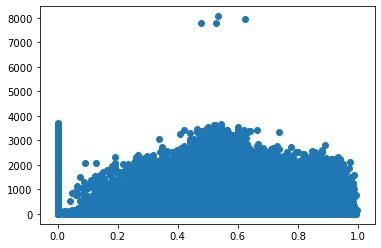

In [59]:
# WE showed how the time difference column values are distiributed regarding the values weighted vote scores
plt.scatter(data1, data2)
plt.show()

Here we analyze the correlation between these two columns. 

In [73]:
corr_df = df[["weighted_vote_score","Time_diff_in_day"]]
corr_df.shape

(5837112, 2)

In [63]:
corr_result = df["weighted_vote_score"].corr(df["Time_diff_in_day"])
corr_result

0.054573092440412016

Since the Correlation Coefficient 0.055 is less than 0.5, we can say that there is no positive relationship between weighted vote score and time difference data. 
There is **NO**  significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score

### 3.7.3. Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

As we are requested to use the records that we used in the previous question so we will work on them. Here we will filter the reviews that have recommended column as True and False. Then we will analyze the relationship between those. 

In [74]:
rec_WVS = df[df["recommended"] == True]["weighted_vote_score"]
not_rec_WVS = df[df["recommended"] == False]["weighted_vote_score"]

print('rec_WVS    : mean=%.4f stdv=%.3f' % (rec_WVS.mean(), rec_WVS.std()))
print('not_rec_WVS: mean=%.4f stdv=%.3f' % (not_rec_WVS.mean(), not_rec_WVS.std()))

rec_WVS    : mean=0.1867 stdv=0.256
not_rec_WVS: mean=0.2914 stdv=0.251


In [75]:
test_stat, pvalue = mannwhitneyu(rec_WVS,not_rec_WVS)

print('Test Stat = %.4f, p-value = %.10f' % (test_stat, pvalue))

Test Stat = 1892872271669.5000, p-value = 0.0000000000


In [76]:
corr_result_2 = df["weighted_vote_score"].corr(df["recommended"])
corr_result_2

-0.14871555396656264

In [78]:
print(corr_df2.corr())

                     weighted_vote_score  Time_diff_in_day  recommended
weighted_vote_score             1.000000          0.054573    -0.148716
Time_diff_in_day                0.054573          1.000000    -0.000877
recommended                    -0.148716         -0.000877     1.000000


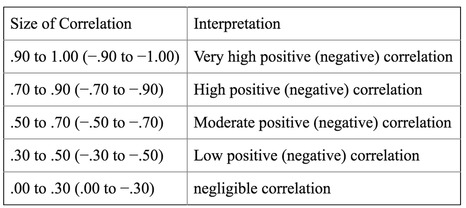

If our correlation result is less than -0.5, we can define a negative relationship,
If it is greater than +0.5, we can define a positive relationship. \
But since the values we have obtained for all 3 columns here are around 0, there is no any change in the relationship of the variables mentioned in the previous literal if we include whether an application is recommended. 

In [79]:
df["recommended"].value_counts()

True     4905918
False     931194
Name: recommended, dtype: int64

Then here we will filter the reviews that recommended the applications and again check re relation. 

In [84]:
dfRQ8_recommend = df[df['recommended'] == True]
dfRQ8_recommend

,timestamp_created,timestamp_updated,recommended,weighted_vote_score,Time_difference,Time_diff_in_day
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558,True,0.000000,204 days 18:46:03.913558,204
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252,True,0.000000,77 days 05:52:18.793252,77
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840,True,0.000000,37 days 11:10:44.663840,37
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568,True,0.000000,27 days 21:15:00.747568,27
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203,True,0.523810,86 days 10:39:41.196203,86
...,...,...,...,...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000,True,0.191392,7 days 00:24:08,7
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000,True,0.619158,0 days 00:48:28,0
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000,True,0.521739,1 days 14:31:12,1
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000,True,0.386022,16 days 04:43:11,16


Here you can see the reviews that recommended an application. 

In [85]:
display(dfRQ8_recommend)

,timestamp_created,timestamp_updated,recommended,weighted_vote_score,Time_difference,Time_diff_in_day
6,2019-02-18 13:30:37,2019-09-11 08:16:40.913558,True,0.000000,204 days 18:46:03.913558,204
11,2006-01-20 14:08:58,2006-04-07 20:01:16.793252,True,0.000000,77 days 05:52:18.793252,77
17,2006-10-15 02:53:35,2006-11-21 14:04:19.663840,True,0.000000,37 days 11:10:44.663840,37
19,2003-08-28 01:31:22,2003-09-24 22:46:22.747568,True,0.000000,27 days 21:15:00.747568,27
23,2016-11-24 18:12:56,2017-02-19 04:52:37.196203,True,0.523810,86 days 10:39:41.196203,86
...,...,...,...,...,...,...
38641155,2020-03-23 19:08:31,2020-03-30 19:32:39.000000,True,0.191392,7 days 00:24:08,7
38641156,2020-03-23 19:08:04,2020-03-23 19:56:32.000000,True,0.619158,0 days 00:48:28,0
38641161,2020-03-23 19:06:30,2020-03-25 09:37:42.000000,True,0.521739,1 days 14:31:12,1
38641168,2020-03-23 19:03:51,2020-04-08 23:47:02.000000,True,0.386022,16 days 04:43:11,16


In [86]:
corr_df3 = dfRQ8_recommend[["weighted_vote_score","Time_diff_in_day"]]
corr_df3.shape

(4905918, 2)

In [87]:
print(corr_df3.corr())

                     weighted_vote_score  Time_diff_in_day
weighted_vote_score             1.000000          0.070967
Time_diff_in_day                0.070967          1.000000


To analyze the correlation between the time difference and the weighted vote scores of only the recommended ones, we removed the False rows in the "recommended" column from the data. \
Then, we observed an increase in the correlation between weighted vote scores and time differences,  from 0.054575 to 0.070969. However, when we interpret the value of 0.071 by looking at the table, we can see that it is a negligible value and we cannot comment on the relationships of the variables in our data set.

Also we can go for checking the reviews that don't recommend an application. 

In [88]:
dfRQ8_notrecommend = df[df['recommended'] == False]
dfRQ8_notrecommend

,timestamp_created,timestamp_updated,recommended,weighted_vote_score,Time_difference,Time_diff_in_day
126,2020-03-26 02:49:33,2020-06-16 07:37:22.093205,False,0.476190,82 days 04:47:49.093205,82
132,2006-03-20 07:13:32,2006-08-16 21:21:44.174080,False,0.476190,149 days 14:08:12.174080,149
160,2001-04-05 05:54:47,2001-06-13 13:21:58.875542,False,0.523810,69 days 07:27:11.875542,69
445,2010-10-31 00:49:05,2011-01-09 09:14:00.373007,False,0.466321,70 days 08:24:55.373007,70
731,2007-04-09 16:10:36,2007-07-25 22:38:10.270336,False,0.476190,107 days 06:27:34.270336,107
...,...,...,...,...,...,...
38640152,2020-03-23 21:20:10,2020-03-23 21:59:39.000000,False,0.331489,0 days 00:39:29,0
38640276,2020-03-23 21:08:49,2020-03-24 09:32:22.000000,False,0.435153,0 days 12:23:33,0
38640319,2020-03-23 21:04:51,2020-03-25 19:29:12.000000,False,0.458962,1 days 22:24:21,1
38640958,2020-03-23 19:51:47,2020-03-27 16:23:35.000000,False,0.435488,3 days 20:31:48,3


Here you can see the reviews that didn't recommend an application. 

In [89]:
corr_df4 = dfRQ8_notrecommend[["weighted_vote_score","Time_diff_in_day"]]
corr_df4.shape

(931194, 2)

In [90]:
print(corr_df4.corr())

                     weighted_vote_score  Time_diff_in_day
weighted_vote_score             1.000000         -0.034312
Time_diff_in_day               -0.034312          1.000000


Although with the reviews that have recommended value set to False, it changed the correlation from positive to negative, the result is negligible again. 

### 3.7.4. What are histograms, bar plots, scatterplots and pie charts used for?

Humans always like to interpret pictures more than text. This is supported by the biological fact that 90% of facts that come to the brain are in form of Visuals. Especially if we are dealing with data, visualization is a key concept. We grasp more by seeing visuals(graphs, charts, etc.) rather than just seeing data in the form of raw text. Visualization through images makes our brain to process faster and looks pleasant rather than just a big junk of text.

###### Histograms
A histogram is a vertical bar chart that depicts the distribution of a set of data. Each bar in a histogram represents the tabulated frequency at each interval/bin.\
In other words, histograms help gives an estimate as to where values are concentrated, what the extremes are, and whether there are any gaps or unusual values. They are also may use for giving a rough view of the probability distribution.\
Since histogram allows us to group continuous data into bins, it provides a good representation of where observations are concentrated.

###### Bar Plots  
Bar chart compares the measure of categorical dimension. As we can see, comparing the height of each bar gives us a more intuitive perception than looking at the table alone. Bar chart is very similar to a histogram. The fundamental difference is that the x-axis of bar charts is categorical attribute instead of numeric interval in the histogram. 
Column and bar charts showcase comparisons across different categories, while line charts excel at showing trends over time.

###### Scatterplots

The scatter plots are useful for identifying relationships between numeric variables.The dots in a scatter plot report the values of individual data points and patterns when the data are taken as a whole.
Identification of correlational relationships are common with scatter plots. In these cases, we want to know, if we were given a particular horizontal value, what a good prediction would be for the vertical value. You will often see the variable on the horizontal axis denoted an independent variable, and the variable on the vertical axis the dependent variable. Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.

###### Pie charts
Pie charts are used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar charts and line graphs, pie charts do not show changes over time. \
Pie charts are the best choice used for expressing a part-to-whole relationship. When we want to show “percent of…” or “part of…” our data,  a pie chart could meet your needs.

### 3.7.5. What insights can you extract from a Box Plot?

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data. A box plot is created using a number or rate/ratio field on the y-axis.

Box plots can answer questions about our data, such as: \
How is our data distributed? \
Is our data skewed or not? \
Are there any outliers in the dataset? \
What are the variations in the spread of several series in the dataset? 



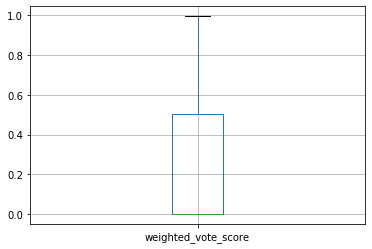

In [91]:
boxplot = df.boxplot(column=['weighted_vote_score'])

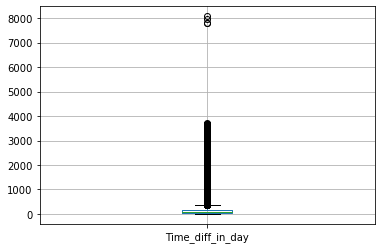

In [92]:
boxplot = df.boxplot(column=['Time_diff_in_day'])

# 4. Theoretical questions

### 4.1. TQ1

We are given the following algorithm:

In [ ]:
Input: 
    A: array of length n            #generic array full of random numbers where len(A) = n : number of elements in the array 
    k: integers between 1 and n     # k is any number between 1 and n
    
function alg(A, k):                 #call the function alg, which takes the two parameters just defined 
  s <-- a random element of A                    #pick at random an element from A
  set L = [all the elements of A with value <= s]   #create a set L(eft) with all the elements of A that have value <= s
  set R = [all the elements of A with value > s]    # create another set with the remaining elem
  r = len(L)                                      #setting r as the length of set L
  if k == r:                            #now if k which is an arbitrary value is equal to r it returns s
    return s
  else if k < r:                       #otherwise it goes to the next iteration. 
    return alg(L, k)
  else:
    return alg(R, k - r)


* As we want to see the real output of this psuedocode, we decided to implement it. <br/>
* Here you can find its implementation in python:

In [6]:
def alg(A,k):
    s = A[randint(0,len(A)-1)]
    L = [val for val in A if val <= s]
    R = [val for val in A if val > s]
    print(L,R)
    r = len(L)
    if k == r:
        return s
    elif k<r:
        return alg(L, k)
    elif k>r:
        return alg(R, k-r)
alg([20,10,40,50,30],1)
                                       #'''It workss!!'''

[20, 10, 40, 30] [50]
[20, 10] [40, 30]
[20, 10] []
[20, 10] []
[10] [20]


10

### 4.1.1. What does the algorithm compute?

Let's see together a simple example of the application of this algorithm :

* First example:<br/>
A = [20,10,30], so 'k' can take one of these values {1,2,3}<br/>
Let's call alg(A, say k = 1) what happens?<br/>
's' is picked randomly from 'A', say 30, then two sets 'L' and 'R' are created (are they gonna be sorted? let's say no. meaning that they will be created just by looking at each element of 'A' and appending it to 'L'/'R' based on the satisfied condition. 'L' will store the elements of 'A' which are lower or equal to 's' and 'R' will store the elements of 'A' which are greater than 's'.<br/><br/>
In this case by picking at random 's' = 30 we have L = [20,10,30], 'R' = []<br/><br/>
At each iteration 'r' is variable which is equal to the lenght of 'L'. In our example here it's 3. <br/><br/>
Now let's check the if statements: is 'k = r'? (1 = 3?) --- > False <br/>
Is 'k < r' ? ----> True<br/><br/>
* So let's iterate again by calling alg( L, 1 ).<br/><br/>

**Something suspicious... in this example this can be one of the worst cases. Imagine at each iteration the algorithm pick the biggest value in the set. Then we will have a infinite loop which will work for ever and do not stop.** 
* alg(L,1)
's' picked at random, say 10. So 'L' = [10] 'R' = [20,30] 'r' = 1<br/><br/>
Is 'k = r'? 1=1 -----> True.<br/><br/>So the algorithm returns back the value of 's' to the previous iteration which is 10 here. . 

As we see if 's' is the biggest value in the array and 'k' is < 'r' the goes to the next iteration. <br/>
While if 's' would have been '1'0 the algorithm would have ended in just one iteration.

As it's possible to understand from this example and a brief analysis of the algorithm, it becomes clear with just few examples through the impledmented algorithm above, that it computes the first k^th lowest number in the array:
e.g [10, 20] k = 1 returns 10,  [10,20] k = 2 returns 20 


### 4.1.2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?
--

* Well in real time if we want to consider the worst case of this algorithm we would say it's time complexity is **O(∞)**. <br/>
Consider the example we have mentioned above. If for k = 1, at each iteration the algorithm pick s as the biggest value in the array ---> We will be in an infinite loop.<br/><br/>
* While in general as each algorithm can have a time complexity of O(∞) and it doesn't provide us any useful information then we whould say it's O(n^2). <br/>
This happens were we set k to the lenght of the array but at each iteration we pick s first the first lowest value in the array, then in the next iteration the second lowest value and so on. So in this case at each iteration (which in total we have n iterations) we will go through all the values of the array. ----> O(n^2)

### 4.1.2. What is asymptotically the running time of the algorithm in the best case?

* The best case of this algorithm is where pick our kth lowest value in just one iteration. In this case our time complexity will be O(n). <br>
This is O(n) as even if we pick 's' as the kth lowest value in the array we still need to go over the values in the array to produce L and R. 

# 4.2. TQ2

### 4.2. You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

In [ ]:
def splitSwap(a, l, n): # This algorithm receives three parameters. a is the array. i is an index and n is the length.
    if n <= 1:          # This function will make a in to to halves based in the index i. 
        return 
    splitSwap(a, l, n/2)
    splitSwap(a, l+ n /2, n/2)
    swapList(a, l, n)
    
def swapList(a, l, n): # This algorithm receives three parameters. a is the array. i is an index and n is the length.
    for i in range(n/2): # Basically this algorithm will consider the whole array in to two halves. Then swap
        tmp = a[l + i]   # the elements in these two halves by each other index by index. 
        a[l + i] = a[l + n/2 + i]
        a[l + n/2 + i] = tmp
    return tmp

### 4.2.1 How much running time does it take to execute splitSwap(a, 0, n)?  (We want a Big O analysis.)

We know that in each iteration we are split the given array into halves. For processing this function we have log n iterations and in each iterations we have n iterations again to do the split swaps. So we can conclude the time complexity of this process in O(nlogn). 

### 4.2.2. 2) What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.


* We will show that this two functions together will reverse the given array. 

For simplification to describe what this functions are doing we have these notations:<br/> 
1. At each iteration when we want to call the function splitSwap(a, l, n/2) we will put (1)<br/>
2. At each iteration when we want to call the function splitSwap(a, l+ n /2, n/2) we will put (2)<br/>
3. At each iteration when we want to call the function swapList(a, l, n) we will put (3). <br/>

Now consider this example: a = [1, 2, 3, 4], i = 0, n = 4 <br/>
Then we will have these iteration: <br/>
0.(1) a = [1, 2, 3, 4], i = 0 , n = 2<br/>

1.(1) a = [1, 2, 3, 4], i = 0, n = 1 -----> Here we will go back to the previous iteration and continue where the function was called. <br/>
1.(2) a = [1, 2, 3, 4], i = 2, n = 1 -----> Here we will go back to the previous iteration and continue where the function was called. <br/>
1.(3) a = [1, 2, 3, 4], i = 0 , n = 2 ----> Here we will call the swap list function and swap some element of a. 
Excatly these indexes{(0, 1)}. then a = [2, 1 ,3, 4]<br/>

0.(2) a = [2, 1, 3, 4], i = 2, n = 2<br/>
1.(1) a = [2, 1, 3, 4], i = 2, n = 1 -----> Here we will go back to the previous iteration and continue where the function was called. <br/>
1.(2) a = [2, 1, 3, 4], i = 3, n = 1 -----> Here we will go back to the previous iteration and continue where the function was called. <br/>
1.(3) a = [2, 1, 3, 4], i = 2, n = 2 Here we will call the swap list function and swap some element of a. 
Excatly these indexes{(2, 3)}. then a = [2, 1 ,4, 3]<br/>

0.(3) a = [2, 1, 4, 3], i= 0, n = 4 Here we will call the swap list function and swap some element of a. 
Excatly these indexes{(0, 2), (1, 3)}. then a = [4, 3 ,2, 1]<br/>


As you can see here the given array [1, 2, 3, 4] converted to [4, 3, 2, 1] which is the reversed of the array. 

**We believe that this algorithm is not optimal. As we know O(nlogn) > O(n).**

The optimal function to do this process is with time complecity O(n). We can go through the array from the last element to the first element and this will give us the reverse of the given array. 

# 4.3 TQ3


In the knapsack problem we are given n objects 
and each object i has a weight w_i 
and a value v_i. 
We are also given a weight budget W. 
The problem is to select a set of objects
with total weight bounded by W that maximized the sum of their values.
The following are three natural heuristics:

Order them in increasing order of weight and then visit them sequentially,
adding them to the solution as long as the budget is not exceeded

- counter example: value(60, 100, 120) weight(10, 20, 30) W = 50

In this case the heuristic would find this solution : value = 60+100 = 160 given by the ordered increasing weight 10+20 < 50 which is of course not the best solution val = 220 given by 20+30

Order them in decreasing order of values, and then visit them sequentially,
adding them to the solution if the budget is not exceeded

- counter example: value(120, 100, 60) weight(40, 25, 15) W = 50

In this case the heuristic would find this solution: val = 120 w = 40 < 50 which is not the best solution given by picking val = 100+60 w = 25+15 < 50

Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, 
adding them to the solution if the budget is not exceeded

- counter example: value(6, 5, 50, 1,1,1,1,1,1,1,1) weight(1, 1, 10, 1,1,1,1,1,1,1,1) W = 10 

The heuristic would find: ordered in decreasing relative value (6,5,5,1,1,1,1,1,1,1,1) and for thi reason would choose 6,5 and all the other ones so val = 6+5+1+1+1+1+1+1+1+1 = 19 when by choosing just 50 it would be of course the best solution.

For each of the heuristics, provide a counterexample,
that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.